# Linear Regression

## Part 1: Approximating functions


### Least squares method: problem statement

Consider a system of equations $Xa = y$ in which $a$ is a column of unknowns. It can be rewritten in vector form
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
where $x_1,\ldots,x_k$ are the columns of the matrix $X$. Thus, solving the original system means finding a linear combination of vectors $x_1,\ldots,x_k$ equal to the right side. But what if there is no such linear combination? Geometrically, this means that the vector $y$ does not lie in the subspace $U = \langle x_1,\ldots, x_k\rangle$. In this case, we can find a *pseudo-solution*: a vector of coefficients $\hat{a}$, for which the linear combination $x_1 \hat{a}_1 + x_2\hat{a}_2 + \ldots + x_k\hat{a}_k$, although not exactly equal to $y$, but is the best approximation — that is, the point closest to $y$ is $\hat{y}$ of the subspace $U$ (in other words, the orthogonal projection of $y$ onto this subspace). So, the purpose of our search can be formulated in two equivalent ways:

1. Find the vector $\hat{a}$ for which the length of the difference $|X\hat{a} - y|$ is minimal;
2. Find the orthogonal projection $\hat{y}$ of the vector $y$ onto the subspace $U$ and represent it as $X\hat{a}$.

Next, we will assume that the vectors $x_1,\ldots,x_k$ are linearly independent (if not, then first it makes sense to allocate the maximum linearly independent subsystem).

During the lectures, it was shown that the projection of the vector $y$ onto the subspace $U = \langle x_1,\ldots, x_k\rangle$, is written as
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty,$$
and, accordingly, the desired vector $\hat{a}$ is equal to
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Linear regression problem

Let's start with an example. Let's say you want to find the dependence of the average grade S of a student of the FCS on his height H, weight W, hair length L and N — the number of hours he devotes to studying every day. Imagine that we measured all these parameters for $n$ students and got sets of values: $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ and so on.

Now we want to build a **model**, i.e. define an algorithm that will take as input a certain set of parameters (in this case, these are the $H, W, L$ and $N$ measured by us), and output the value of some **target variable** (in this example, this is $S$). Here you can select many different smart models, but it makes sense to start with the simplest, linear:

$$S = a_0 + a_1H + a_2W + a_3L + a_4N.$$

Of course, there is no strict linear dependence (otherwise it would be possible to happily abolish exams), but we can try to find coefficients $a_0, a_1, a_2, a_3, a_4$ that satisfy such a requirement:
$$\sum_{i=1}^n\left(S_i - ( a_0 + a_1H_i + a_2W_i + a_3L_i + a_4N_i)\right)^2\longrightarrow \min$$
I.e. we want the square of deviation of the right part from the left to be smaller for all $n$ students. Let's introduce some notation:
$$X =
\begin{pmatrix}
1 & H_1 & W_1 & L_1 & N_1\\
1 & H_2 & W_2 & L_2 & N_2\\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & H_n & W_n & L_n & N_n
\end{pmatrix}, \qquad a=
\begin{pmatrix}
a_0\\ a_1\\ \vdots\\ a_4
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}.$$

Now our requirement above can be rewritten in this form:
$$
\sum_{i=1}^n\left(S_i - ( a_0 + a_1H_i + a_2W_i + a_3L_i + a_4N_i)\right)^2 = |y - Xa|^2 \longrightarrow \min
$$

And now it is clear that we have received a problem for the least squares method!
Solving this problem with the help of already known formulas, we obtain estimates of the coefficients $\hat{a}_i$ ($i = 1\ldots,5$).

Now let's talk about the general formulation of the linear regression problem. We have $k$ variables $x_1,\ldots,x_k$ ("regressors") through which we want to express the "explicable variable" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k$$
We measured the values of all variables $n$ times (for $n$ different objects, at $n$ different points in time - it depends on the task). Substitute this data into the previous equality:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(here $x_{ij}$ is the value of the $j$-th feature on the $i$-th dimension). It is convenient to rewrite it in matrix form:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
or in short $Xa = y$. Since in practice this system of equations often has no solution (because dependencies in life are rarely really linear), a pseudo-solution is sought by the least squares method.

### Quality assessment

There are many different quality functions; for now we will only talk about the simplest and most obvious of them: the mean square error. It is equal to
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2$$

### Least squares method

Download the files `train.txt ` and `test.txt`. Each of the files contains two columns of numbers separated by spaces: in the first — a certain number of points (the values of the argument $x$), in the second — the values of some function $y = f(x)$ at these points, distorted by random noise. Task is based on the data from the file `train.txt ` (let's call it a training sample) to pick up a function $y = g(x)$ that decently approximates an unknown dependence.

Download the training and test data (from the file `test.txt`).

In [779]:
import numpy as np
from os.path import join

PATH = "./" 

data_train = np.loadtxt(join(PATH, "train.txt"), delimiter=',')
data_test = np.loadtxt(join(PATH, "test.txt"), delimiter=',')

**0.** Divide the values of $x$ and $y$

In [780]:
X_train = data_train[:,0]
y_train = data_train[:,1]

X_test = data_test[:,0]
y_test = data_test[:,1]

**1.** Using the least squares method, find the linear function $y = kx + b$ that best approximates the unknown dependence. Print this polynomial as $kx+b$.

In [781]:
X = np.ones((len(X_train),2))
X[:,1] = X_train
Y = np.zeros((len(y_train),1))
Y[:,0] = y_train
X_t = X.transpose()
X_1 = np.linalg.inv(X_t.dot(X))
A = (X_1.dot(X_t)).dot(Y)
b = A[0][0]
k = A[1][0]
print('y =',k,'* x +',b)

y = 4.056288475638 * x + 2.4636203047906506


**2.** Draw the points $(x_i, y_i)$ on the plane from both samples and the resulting linear function.

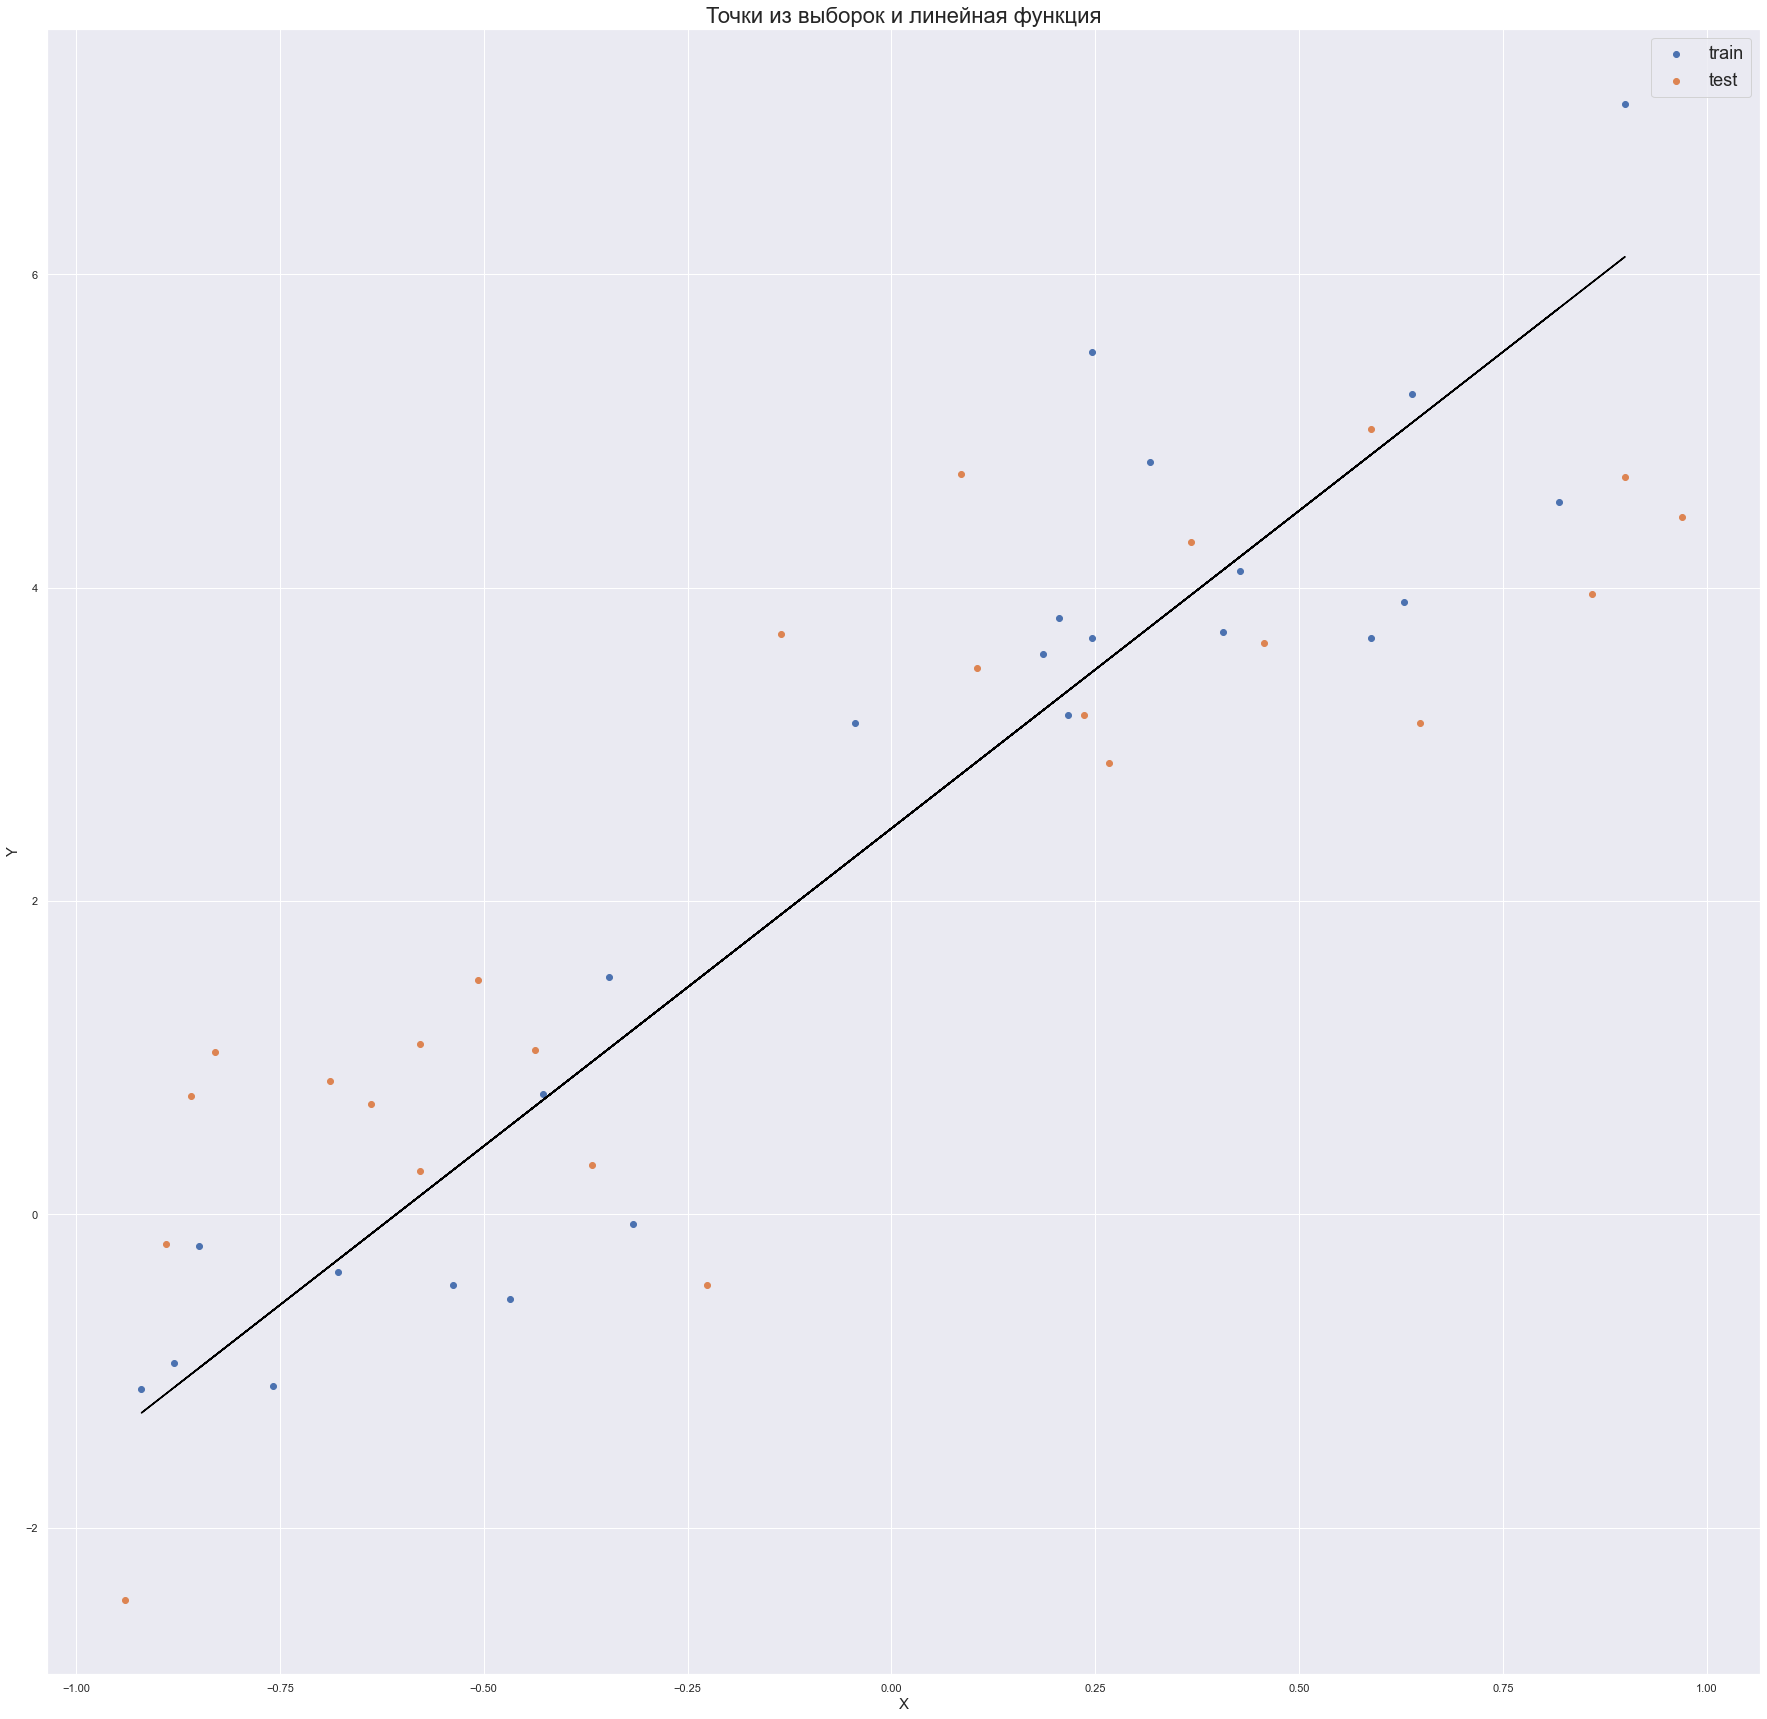

In [782]:
import matplotlib.pyplot as plt
import matplotlib as mt
y = k * X_train + b
plt.title('Points from samples and a linear function',fontsize = 22)
plt.xlabel('X',fontsize = 15)
plt.ylabel('Y',fontsize = 15)
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test)
plt.plot(X_train,y,color = 'black')
plt.legend(['train','test'],fontsize = 18)

**3.** Looking at the data, think about the polynomial of what degree it would be best to approximate this function in terms of minimizing the root-mean-square error on the training sample. Find this polynomial and store its coefficients in the array `poly_coef` (from the lowest term to the highest).

In [783]:
x1 = np.arange(len(X_train))
X = X_train.reshape((-1, 1))
X = X ** x1
Y = np.zeros((len(y_train),1))
Y[:,0] = y_train
X_t = X.transpose()
X_1 = np.linalg.inv(X_t.dot(X))
A = (X_1.dot(X_t)).dot(Y)
poly_coef = A[:,0]

It is best to approximate the function by a polynomial of degree 23 (theoretically), since the number of input data is 24, it follows that since the columns of the matrix X are linearly independent, there will necessarily be such a set of coefficients that the graph will pass through all the necessary points (this follows from the linear system solution by the Gauss method, since our the determinant of a square matrix X is not equal to 0, it follows that the solution will be)

**4.** Draw its plot on the same drawing together with the points $(x_i, y_i)$ from both samples. Did the plot manage to pass through all the points from the sample? Try to explain why?

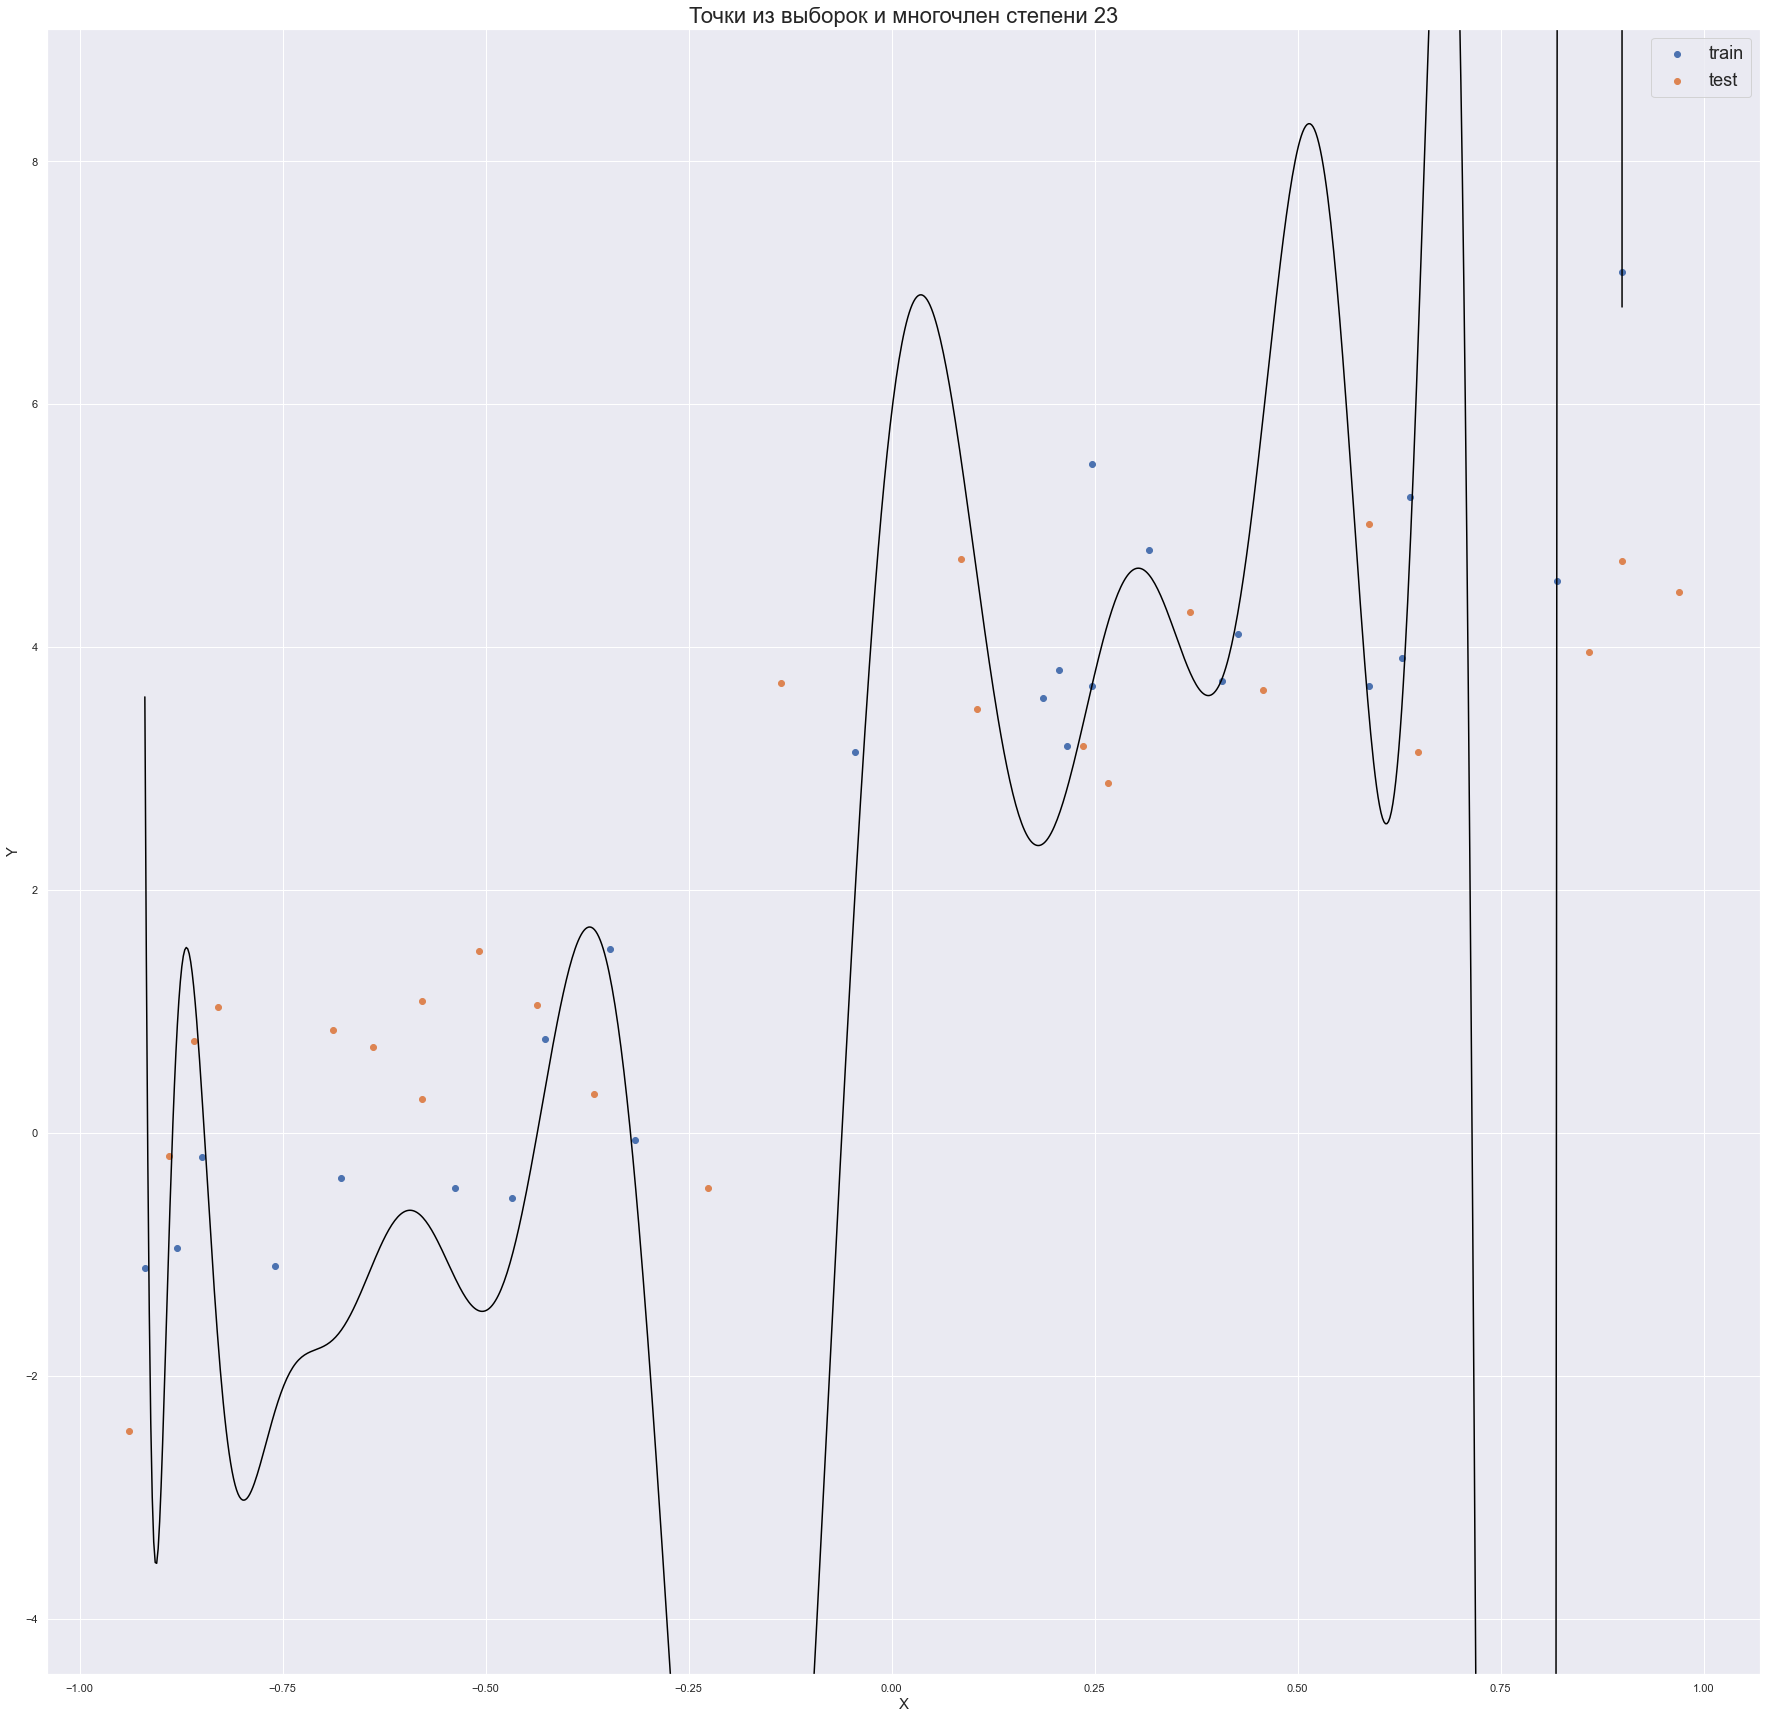

In [784]:
dots = np.linspace(min(X_train), max(X_train), 1000)
x1 = np.arange(24)
dots_value = dots.reshape((-1, 1))
dots_value = dots_value ** x1

minn = min(min(dots),min(X_test))
maxx = max(max(dots),max(X_test))
min_y = min(min(y_train),min(y_test))
max_y = max(max(y_train),max(y_test))
plt.axis([minn - 0.1,maxx + 0.1,min_y - 2,max_y + 2])
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test)
plt.plot(dots,dots_value.dot(poly_coef.T),color = 'black')
plt.title('Points from samples and a polynomial of degree 23',fontsize = 22)
plt.xlabel('X',fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.legend(['train','test'],fontsize = 18)

The plot failed to pass through all the sampling points, due to an error in calculations, since operations are carried out with fractional numbers to the 23rd degree, and accuracy is very important in calculations. In practice , it is best to approximate a polynomial of degree 18

**5.** For $k = 1,2,3,\ldots,10$, find the polynomial $\hat{f}_k$ of degree $k$ that best approximates the unknown dependence. Save the found coefficients of the polynomials to the matrix `poly_coefs` (the coefficients of a polynomial of degree $j$ must be stored in the $j$-th row of the matrix from the lowest term to the highest).

In [785]:
poly_coefs = np.zeros((10,11))
for k in range(10):
    x1 = np.arange(k+2)  
    X = X_train.reshape((-1, 1))
    X = X ** x1
    Y = np.zeros((len(y_train),1))
    Y[:,0] = y_train
    X_t = X.transpose()
    X_1 = np.linalg.inv(X_t.dot(X))
    A = (X_1.dot(X_t)).dot(Y)
    poly_coefs[k,:k+2] = (A[:,0])

assert poly_coefs.shape[0] == 10

**6.** For each of the polynomials from task 1.5, as well as for the polynomial from task 1.4, find the error on the training data and on the test data: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$. Save the received error values to the `errors' matrix of height 11 and width 2. In the first column of the matrix there should be error values on the training data, in the second --- on the test data. In the first 10 rows of the matrix there should be error values for polynomials of the corresponding degrees from task 1.5, in the 11th row --- the error value for the polynomial from task 1.4.

In [786]:
errors = np.ndarray((11,2))
x1 = np.arange(11)  
X = X_train.reshape((-1, 1))
X = X ** x1
coefs = poly_coefs.T
function_value = X.dot(coefs)
y_new = np.array([y_train] * 10).T
error_0 = function_value - y_new
error_0 = np.power(error_0,2)
temp = np.ones((1,len(X_train)))
error = np.ndarray((11))
error[:10] = temp.dot(error_0)

x1 = np.arange(len(X_train))
X = X_train.reshape((-1, 1))
X = X ** x1
y = X.dot(poly_coef.T)
y = y - y_train
y = np.power(y,2)
er = temp.dot(y)
error[10] = er
error = error * (1/len(X_train))
errors[:,0] = error


x1 = np.arange(11)  
X = X_test.reshape((-1, 1))
X = X ** x1
coefs = poly_coefs.T
function_value = X.dot(coefs)
y_new = np.array([y_test] * 10).T
error_0 = function_value - y_new
error_0 = np.power(error_0,2)
error[:10] = temp.dot(error_0)

x1 = np.arange(len(X_train))
X = X_test.reshape((-1, 1))
X = X ** x1
y = X.dot(poly_coef.T)
y = y - y_test
y = np.power(y,2)
er = temp.dot(y)
error[10] = er
error = error * (1/len(X_train))
errors[:,1] = error

print(errors)


[[6.73787907e-01 1.65559241e+00]
 [6.63962311e-01 1.56840984e+00]
 [6.26426164e-01 1.48195650e+00]
 [4.36975836e-01 2.24179410e+00]
 [3.63644276e-01 2.38503935e+00]
 [3.63335325e-01 2.45617717e+00]
 [3.46469349e-01 3.21445996e+00]
 [3.43671833e-01 3.66895541e+00]
 [3.31903254e-01 5.23671494e+00]
 [3.28424922e-01 7.36984985e+00]
 [1.60101258e+00 4.29371974e+08]]


**7.** For $k = 1,2,3,4,6$, draw graphs of the obtained polynomials in one drawing together with the points $(x_i, y_i)$ from both samples

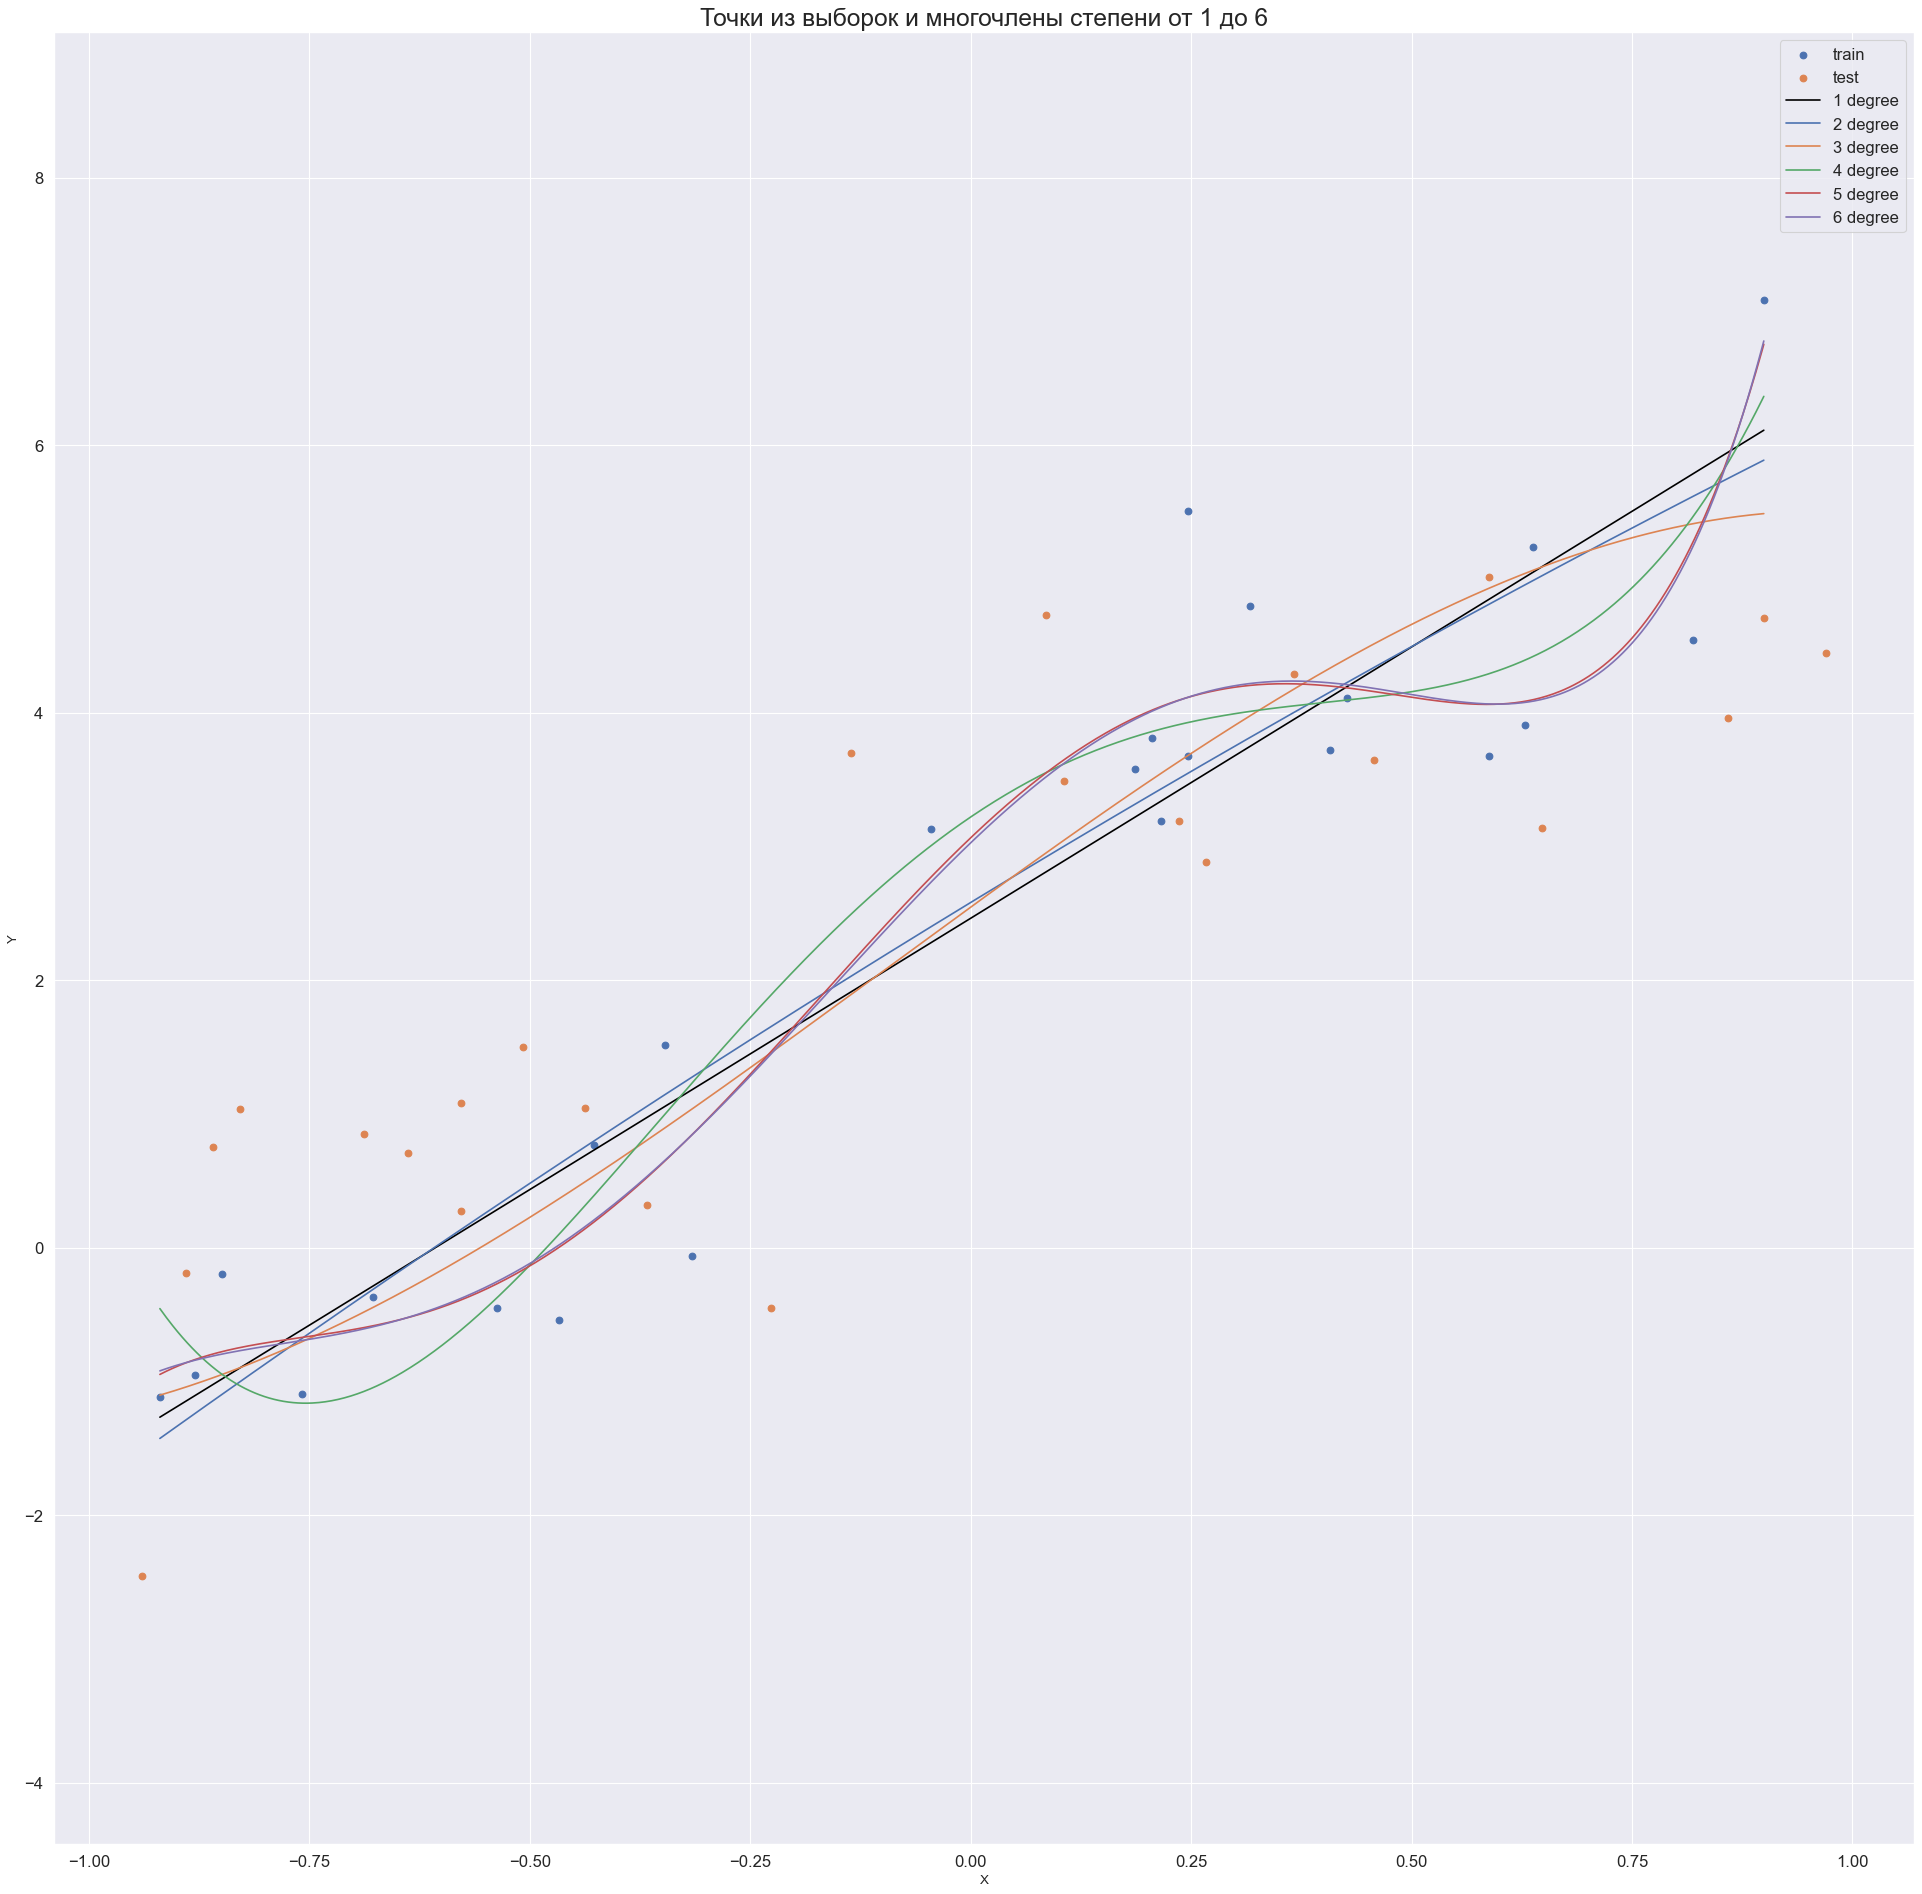

In [787]:
plt.figure(figsize = (30,30),dpi = 80)
dots = np.linspace(min(X_train), max(X_train), 1000)

x1 = np.arange(11)
dots_value = dots.reshape((-1, 1))
dots_value = dots_value ** x1

minn = min(min(dots),min(X_test))
maxx = max(max(dots),max(X_test))
min_y = min(min(y_train),min(y_test))
max_y = max(max(y_train),max(y_test))
plt.axis([minn - 0.1,maxx + 0.1,min_y - 2,max_y + 2])
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test)

plt.plot(dots,dots_value.dot(poly_coefs[0].T),color = 'black')
for i in range(1,6):
    plt.plot(dots,dots_value.dot(poly_coefs[i].T))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Points from samples and polynomials of degree from 1 to 6',fontsize = 22)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['train','test','1 degree','2 degree','3 degree','4 degree','5 degree', '6 degree'],fontsize = 15)

**8.** What happens to the error on the test data when the degree of the polynomial grows? It would seem that the greater the degree, the more complex the polynomial will be and the better it will approximate our function. Do your observations confirm this? 

Yes, theoretically, the more complex the polynomial, the better it approximates, but it better approximates the data on which it is trained, fitting to them, therefore, the error on the training data decreases as the degree of the polynomial increases, thereby the model adjusts to specific points and the value of the function on them, and not to the function itself as a whole accordingly, the more complex the polynomial, the more the model is retrained for the training sample, the greater the error on the test sample

## 2: Train the machines

In this task you have to do the prediction of diamond prices. 

In [788]:
data = np.loadtxt("diamonds_features.csv", delimiter=",", dtype="str")[1:, 0:]
print(data[:5, :])
data_test = np.loadtxt("diamonds_test.csv", delimiter=",", dtype="str")[1:, 0:]

[['0.8' 'Ideal' 'F' 'VS1' '62.4' '55.0' '5.92' '5.88' '3.68' '3884']
 ['0.91' 'Premium' 'F' 'SI2' '61.4' '60.0' '6.23' '6.21' '3.82' '3618']
 ['1.28' 'Premium' 'I' 'VS2' '61.7' '60.0' '7.05' '6.95' '4.32' '6762']
 ['0.41' 'Very Good' 'F' 'SI1' '61.9' '55.0' '4.78' '4.81' '2.97' '769']
 ['1.07' 'Premium' 'F' 'SI2' '61.8' '59.0' '6.53' '6.57' '4.05' '4560']]


Globally, in this task you will have to learn how to build a linear regression model to predict the price of a diamond by its characteristics. The data is arranged in such a way that in each row there are signs describing the object (diamond), and in each fixed column --- all possible values of a specific feature for all objects in the data.

**0.** Divide the sample into training and test.

In [789]:
from sklearn.model_selection import train_test_split
Train, Test = train_test_split(data, test_size=0.3, random_state=45)

Now you have two samples, each containing a random subset of our data. In the future, we will use the training sample to train the linear regression model, and the test sample, respectively, for the test.

### Working with numeric data

Now your data contains both the numerical signs that describe the object that are familiar to you, and categorical signs that describe the belonging of the object to a particular category, and are represented in the data by strings. What to do with the data that is represented by strings --- we'll figure it out a little later, but for now let's forget that we have them, and we'll work only with numeric ones.

**0.5.** Fill the variables `numeric_features` and `categorical_features` with column indexes in the data containing numeric and categorical features, respectively.

In [790]:
numeric_features = [0,4,5,6,7,8,9]
categorical_features = [1,2,3]

['0.31' 'Good' 'E' 'VS2' '63.4' '55.0' '4.32' '4.35' '2.75' '544']
['0.5' 'Premium' 'D' 'SI2' '62.6' '58.0' '5.04' '4.96' '3.13' '1243']
['0.32' 'Very Good' 'E' 'VS1' '61.6' '56.0' '4.4' '4.46' '2.73' '618']
['0.41' 'Ideal' 'E' 'SI1' '62.5' '55.0' '4.77' '4.73' '2.97' '969']
['0.51' 'Ideal' 'D' 'SI1' '61.6' '56.0' '5.1' '5.12' '3.15' '1569']
['0.4' 'Ideal' 'F' 'VVS2' '62.8' '56.0' '4.73' '4.69' '2.96' '1163']
['0.31' 'Very Good' 'H' 'VVS2' '61.9' '58.0' '4.33' '4.36' '2.69' '625']
['0.33' 'Premium' 'D' 'VS2' '60.8' '60.0' '4.52' '4.46' '2.73' '762']
['0.32' 'Very Good' 'F' 'VS1' '62.3' '55.0' '4.38' '4.42' '2.74' '696']
['0.32' 'Premium' 'D' 'SI1' '60.8' '58.0' '4.41' '4.44' '2.69' '589']
['0.42' 'Ideal' 'D' 'VS2' '61.2' '56.0' '4.8' '4.84' '2.95' '1031']
['0.33' 'Ideal' 'G' 'VS1' '60.1' '55.0' '4.55' '4.5' '2.72' '854']
['0.5' 'Very Good' 'J' 'VS1' '61.4' '57.8' '5.09' '5.14' '3.15' '1034']
['0.32' 'Ideal' 'G' 'VS1' '62.3' '55.0' '4.4' '4.37' '2.73' '828']
['0.36' 'Ideal' 'E' 'VS1' '6

**1.** Solve the linear regression problem to predict the price of a diamond by its numerical features (do not forget that the linear model must also contain a feature-free term) and test your solution on test data. Output the obtained regression coefficients for each feature. Try to interpret the coefficients obtained: compare them with each other, look at their signs and at the absolute value and try to give them everyday meaning based on this. Is the constructed interpretation of the model consistent with your ideas about life?

In [791]:

X_value = np.concatenate((np.ones((len(Train[:,1]),1)),Train[:,numeric_features[:6]].astype(float)),axis = 1)
Y_value = Train[:,numeric_features[6]].astype(float)
X_t = X_value.transpose()
X_1 = np.linalg.inv(X_t.dot(X_value))
A = (X_1.dot(X_t)).dot(Y_value)

print(A.reshape(-1,1).T)
A_t = A.reshape(-1,1)

error = 0
X_test = np.concatenate((np.ones((len(Test[:,1]),1)),Test[:,numeric_features[:6]].astype(float)),axis = 1)
Y_test = Test[:,numeric_features[6]].astype(float)
for i in range(len(Test[:,1])):
    value =  X_test[i,:].dot(A_t)
    error += (value - Y_test[i]) **2
error = error/len(Y_test)
print(error)

[[20363.91146418 10917.21997459  -197.8852881    -95.8283471
  -3377.47205217  2097.08603329   -23.07932136]]
[3208122.26590239]


The interpretation of the model is here: carats most affect the cost and this is really consistent with reality, such a large coefficient is only because the weight of the diamond greatly affects the price, and also because the average diamonds have less than 1 carat, that is, the value is quite small.
The free coefficient is so large, since there are a lot of negative coefficients and with them the numbers are greater than 1 in comparison with the coefficient of 10961, plus a margin, since all diamonds should be quite expensive
The coefficient for the percentage of depth is quite large in modulus, but negative, since ideally a diamond should have a depth of 55-60 percent, if it is more than 65 percent, then the diamond will be dark and therefore the price should be noticeably lower. The coefficient is smaller in modulus than, for example, the coefficient for length, since the values in the percent column are mostly two-digit, and in the length column are single-digit. If the percentage is small, then it will bring a small contribution to the cost, because if the percentage is small, it only means that it will not shine very nicely, but if it is more than normal, then it will seem smaller, respectively, the price for it should be less
The diamond table also has a good weight, but it is much less, firstly, the coefficient is two-digit, because the values in the column with the table are two-digit mostly, and also the diamond table affects the gloss, but not as much as the percentage of depth, for example. If the diamond table is small, then the diamond will be dim, but it will still look quite good, if the table is large, then the diamond will shine much less, but this characteristic is not as important as, for example, the "darkness" of the diamond or its shape
The coefficients for length and width "self-destruct", if the diamond has the shape of a regular polyhedron, such diamonds are valued the most, if it is longer than this shape, then the shape will be "worse" and the price is lower

**2.** Try to explain why the situation when the model has large absolute coefficients is undesirable?

Diamonds with characteristics : ['0.31' 'Very Good' 'H' 'VVS2' '61.9' '58.0' '4.33' '4.36' '2.69' '625'] and ['0.32' 'Very Good' 'F' 'VS1' '62.3' '55.0' '4.38' '4.42' '2.74' '696'] they cost about the same and are very similar in themselves, they even belong to the same category of diamonds, but our model predicted due to large coefficients that the first one would cost $ 397, and the second one  - 671 dollars, the difference between them has now become huge, because of the coefficient at carats (our diamonds have a completely insignificant difference, especially since the data may be noisy) the difference between the weights of these diamonds has become significant, also for example in our model at the diamond table there is a coefficient of -95, which is also quite large, in our in the case of the difference between tables = 3, which gives a big difference in price in our model, but in fact tables ranging from 50 to 60 (approximately) have the same value, this is the interval of the ideal table, so for us this difference of 3 is not critical, and for the model - yes, the same can be said about the length and width, here you also need to take into account the fact that this data is most likely with noise.

**3.** Draw a histogram characterizing the distribution of the explained variable in the training sample. In such a diagram, the values of the explained variable should be grouped along the `x` axis, and the number of sample objects with such a value should be on the `y` axis.

Text(0.5, 1.0, 'Гистограмма распределения целевой переменной')

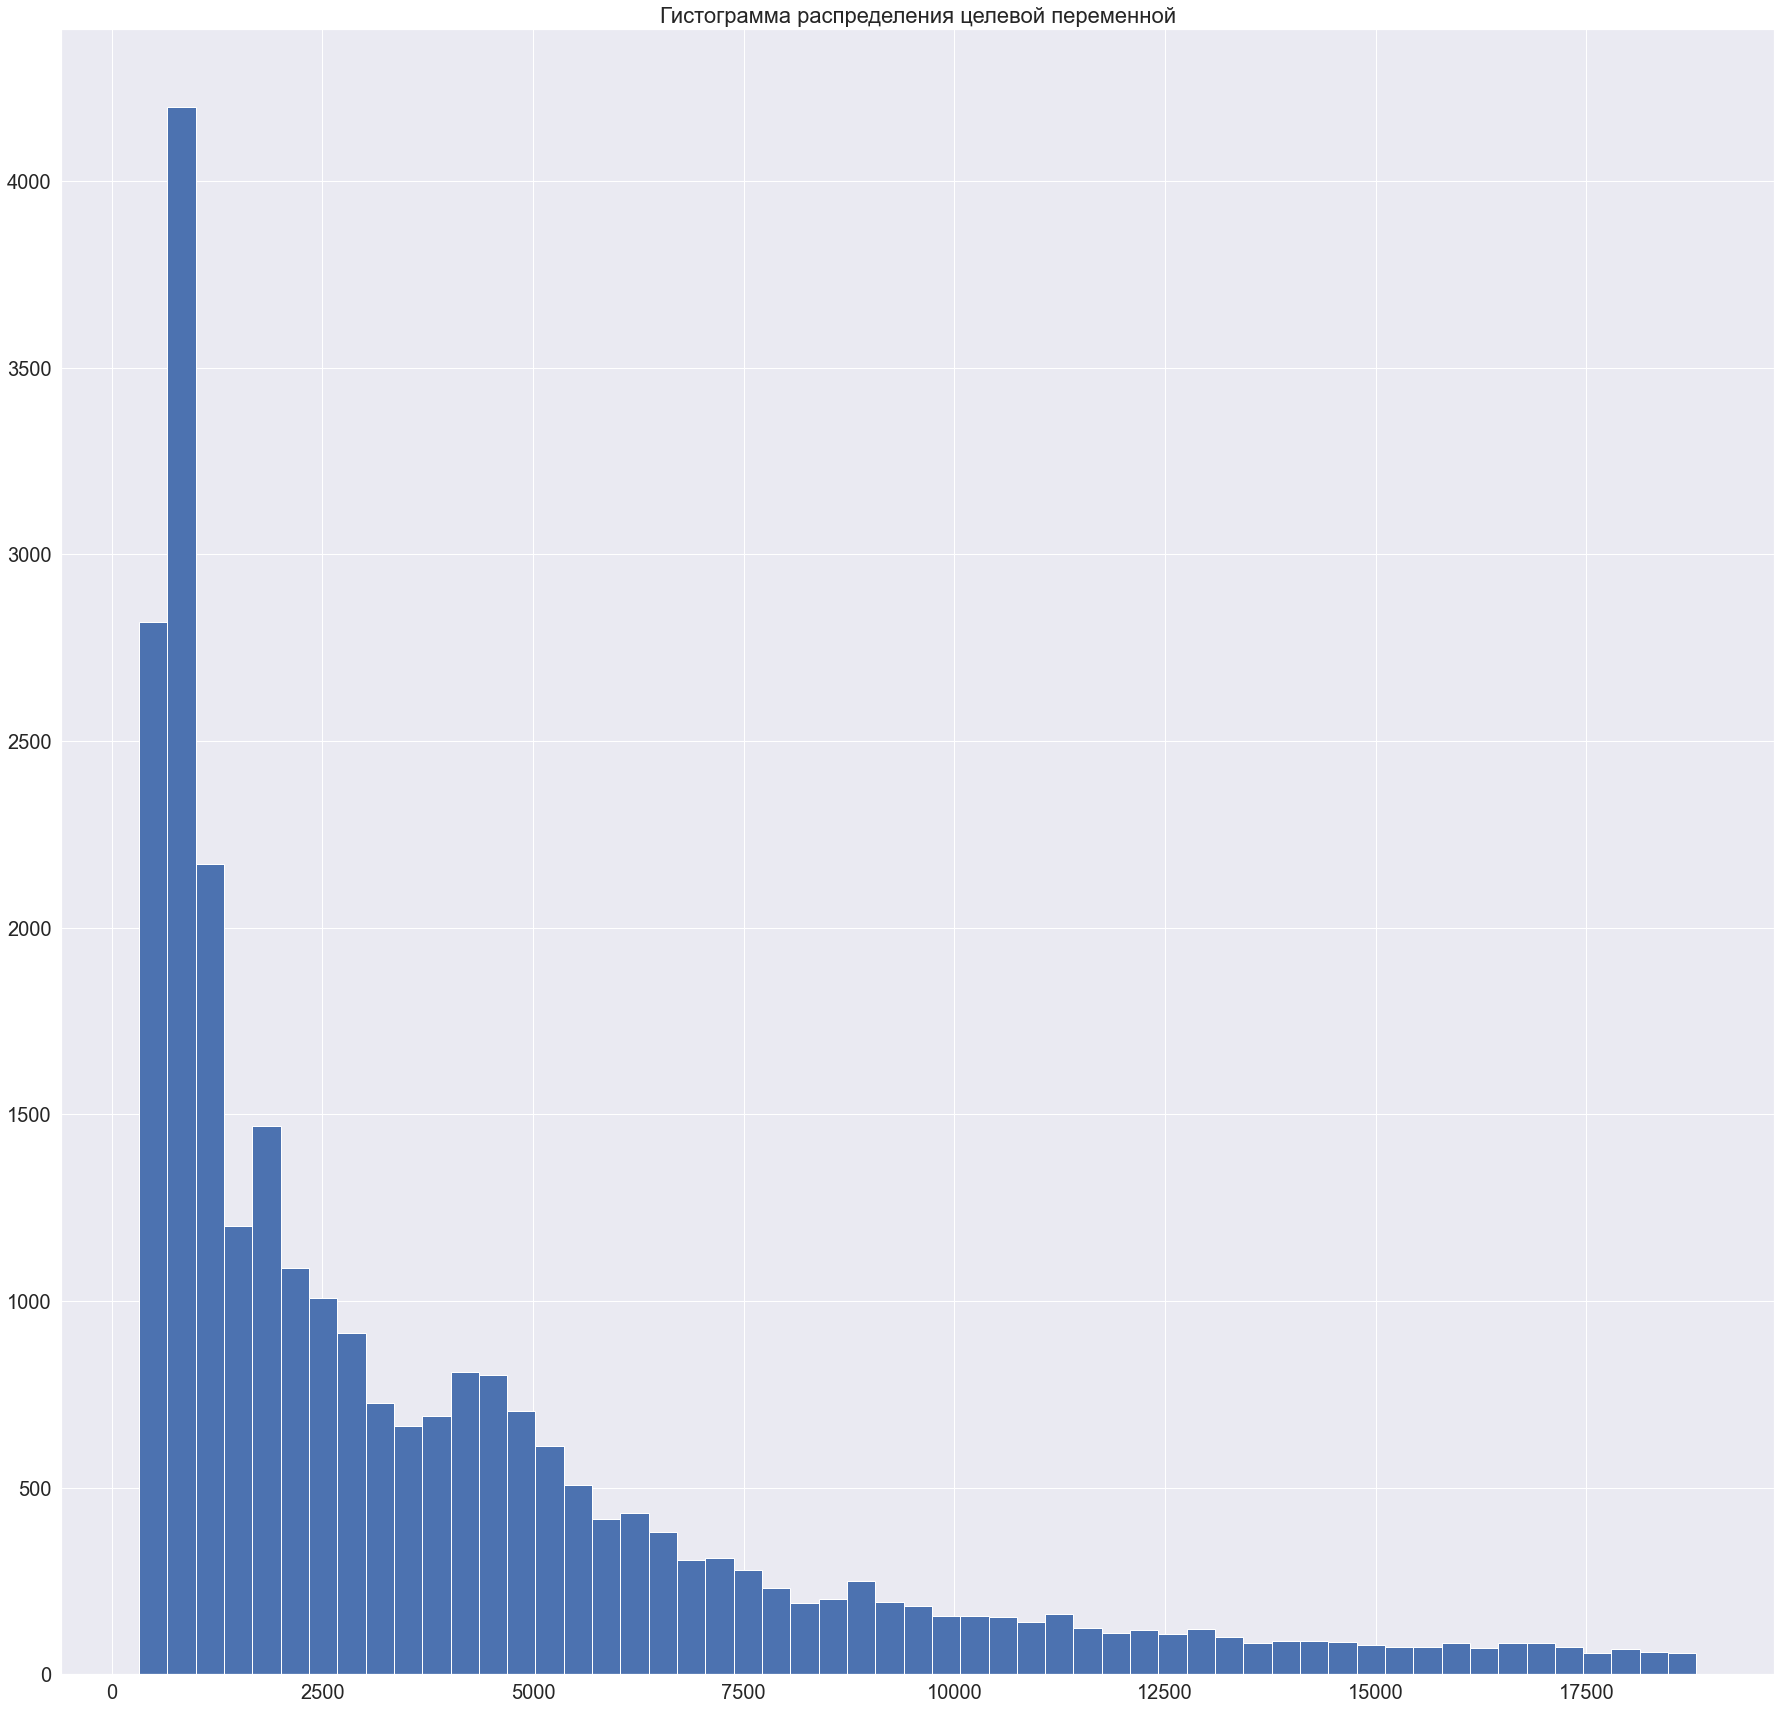

In [792]:
import seaborn as sns
Y_value = Train[:,numeric_features[6]].astype(float)
plot = plt.hist(Y_value, bins = 55)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Histogram of the distribution of the target variable',fontsize = 22)

In the left part of the histogram there are small values of the target variable, and there are quite a lot of objects with such a value in the sample; with an increase in the value of the target (target variable), the number of corresponding objects in the sample decreases. At first, the number of objects decreases quite rapidly, but from some point the difference in height between adjacent columns is almost invisible. This phenomenon is called "heavy tail distribution", and it is not very desirable when building a model.

Let's try to get rid of the heavy tail. To do this, you need to apply some slow-growing bijective function to the target, for example, a logarithm.

**4.** Draw a plot of the distribution of the logarithmic target. Is it much different from the previous chart? Try to explain why the phenomenon of "heavy tail distribution" is undesirable when building a model.

Text(0.5, 1.0, 'Гистограмма распределения логарифмического таргета')

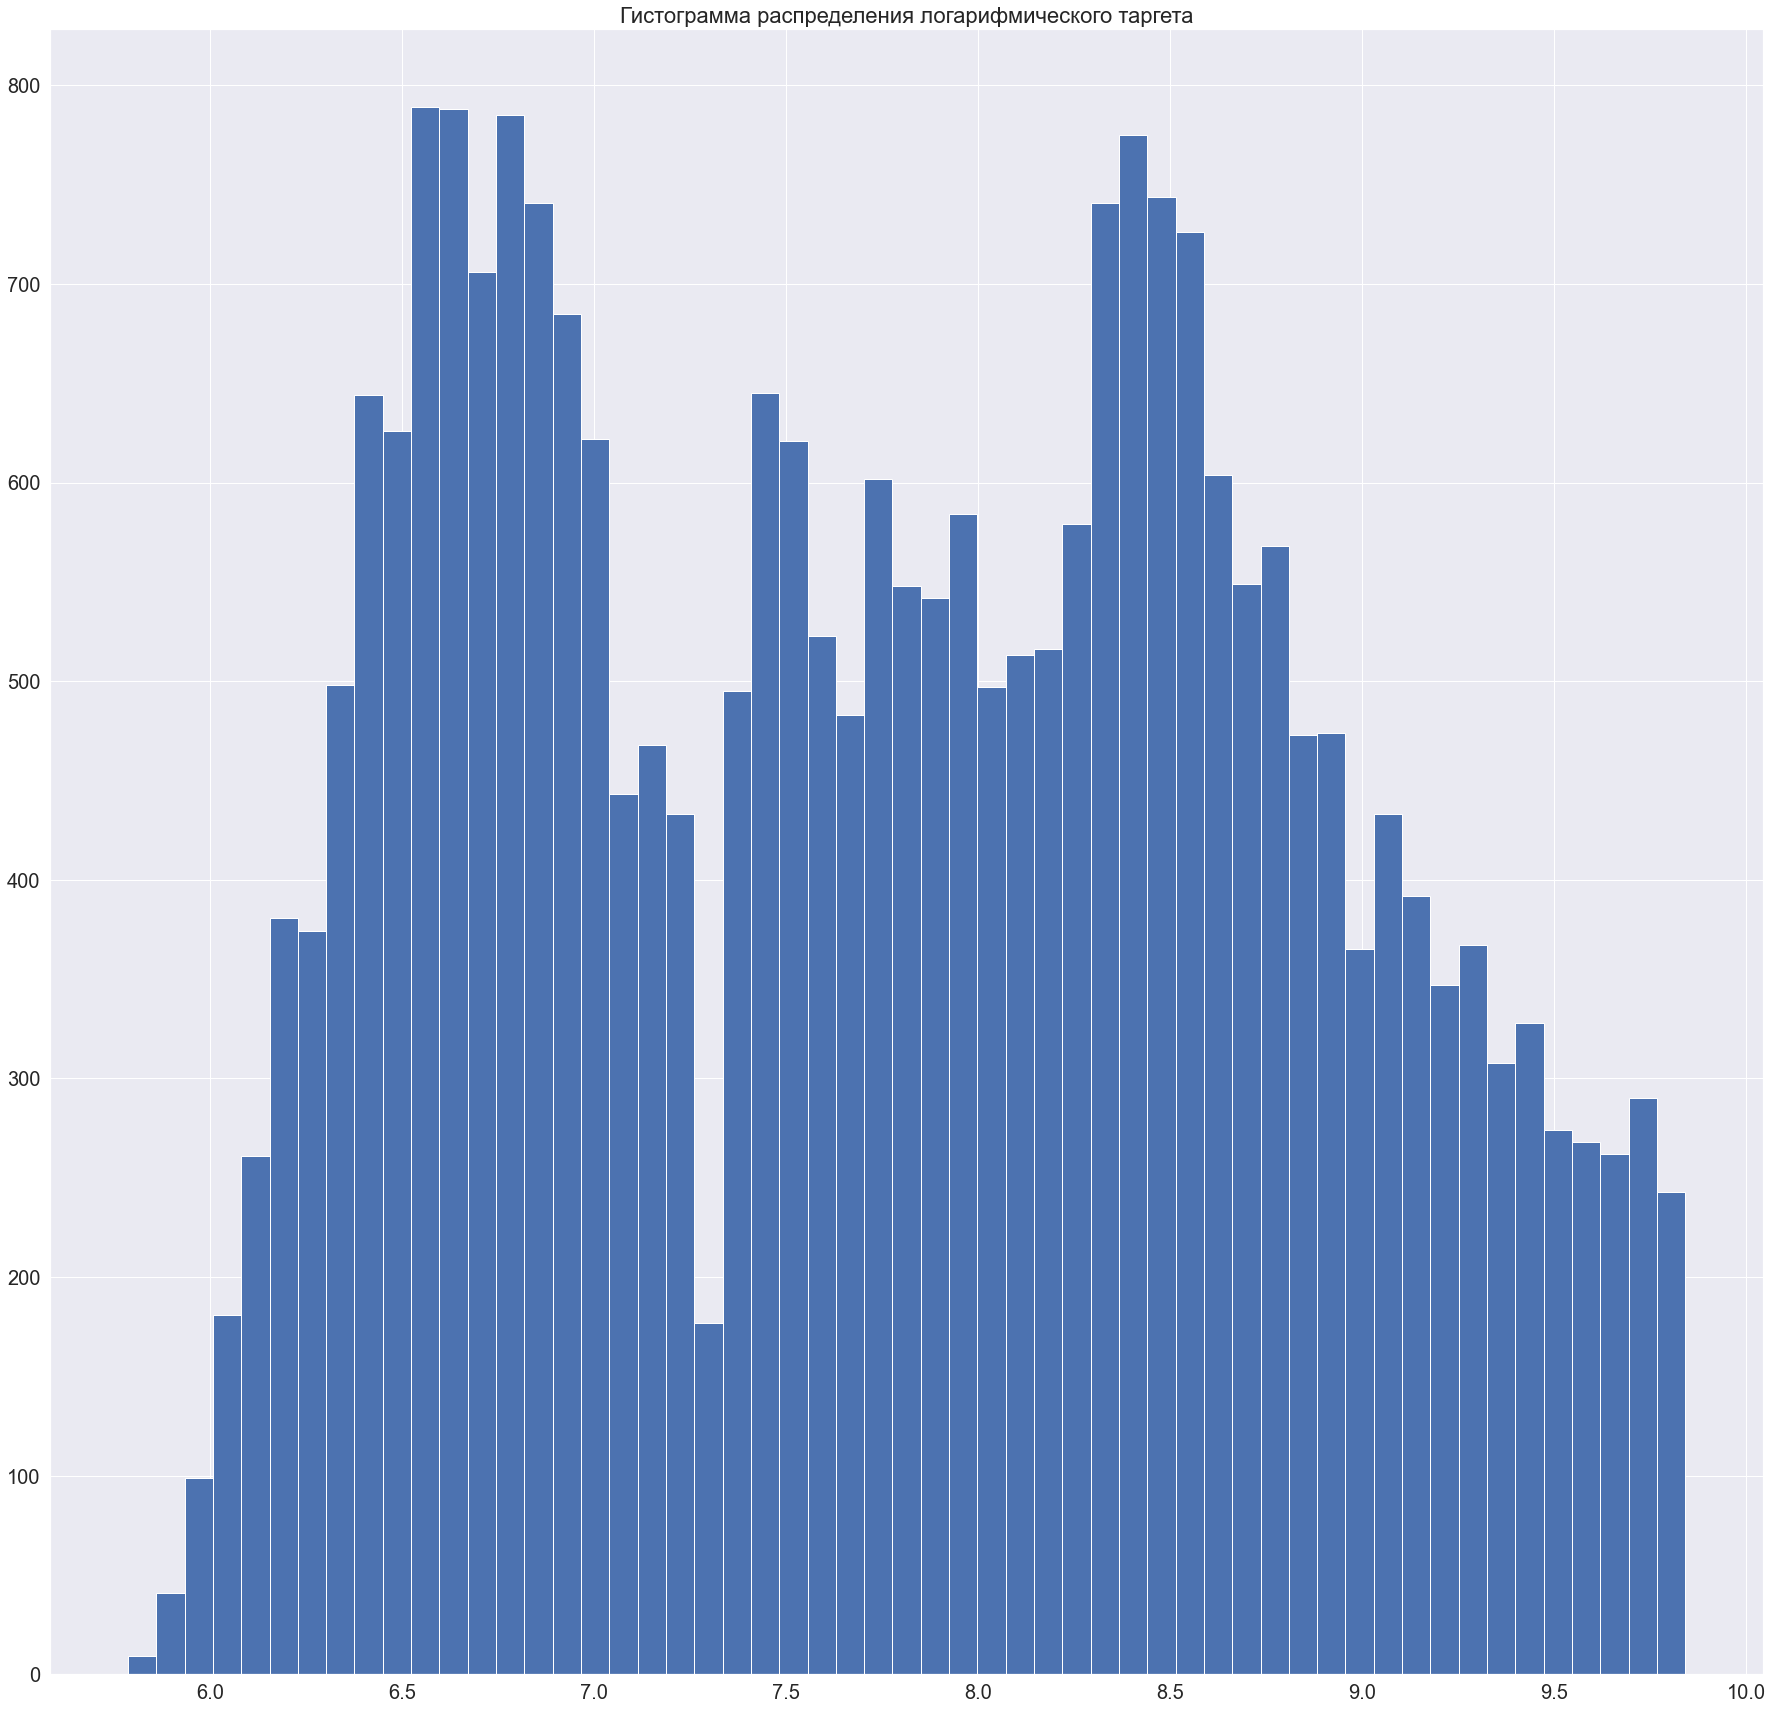

In [793]:
Y_value = Train[:,numeric_features[6]].astype(float)
plot = plt.hist(np.log(Y_value), bins = 55)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Histogram of the logarithmic target distribution',fontsize = 22)

With a distribution is with a heavy tail, the amount of data for each column on the right of the histogram is small, so it is difficult to find the dependence, and due to the fact that the histogram degenerates into a plateau at large target values, the deviation of the result of our model from these target values entails a large error of the constructed model.

Train the linear model again by counting the logarithmic target as the target variable. Remember that in order to test the resulting linear model, it is important to take the exponent from the predictions obtained.

In [794]:
X_value = np.concatenate((np.ones((len(Train[:,1]),1)),Train[:,numeric_features[:6]].astype(float)),axis = 1)
Train_Y = Train[:,numeric_features[6]].astype(float)

for i in range(len(Train_Y)):
    Train_Y[i] = math.log(Train_Y[i])
Y_value = Train_Y.copy()
X_t = X_value.transpose()
X_1 = np.linalg.inv(X_t.dot(X_value))
A = (X_1.dot(X_t)).dot(Y_value)
A_t = A.reshape(-1,1)

Test_Y = Test[:,numeric_features[6]].astype(float)
X_test = np.concatenate((np.ones((len(Test[:,1]),1)),Test[:,numeric_features[:6]].astype(float)),axis = 1)
error = 0
for i in range(len(Test_Y)):
    value =  X_test[i,:].dot(A_t)
    error += (math.exp(value) - Test_Y[i]) **2
error = error/len(Test_Y)
print(error)

1.3141227352150071e+36


### Working with categorical features

So far, we have been working with data that is represented by numbers. However, often in datasets, objects are described not only by signs containing numbers, but also by string signs that determine whether an object belongs to a certain category. Such signs are called categorical. It is important not to throw them out of the model, because they often contain quite useful information about the object, which a good model must necessarily take into account.

In this section, we will consider only categorical features, temporarily forgetting about numerical ones.

Naturally, we need to figure out how to encode categorical signs with numbers. There are quite a few approaches to such encoding, but we will consider the two most basic. The first thought that comes to mind is this: let's number all categories of a fixed attribute, and replace their string representation with the corresponding numerical one.

**5.** Implement the coding procedure described above for all categorical features in the sample.

In [795]:
cut = ['0','Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color = ['0','J','I','H','G','F','E','D']
clarity = ['0','I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
X_value = np.concatenate((np.ones((len(Train[:,1]),1)),Train[:,categorical_features[:3]]),axis = 1)
for i in range(len(Train[:,1])):
    for j in range(1,4):
        if X_value[i][j] in cut:
            X_value[i][j] = cut.index(X_value[i][j])
        elif X_value[i][j] in color:
            X_value[i][j] = color.index(X_value[i][j])
        else:
           X_value[i][j] = clarity.index(X_value[i][j])

Y_value = Train[:,numeric_features[6]].astype(float)
X_value = X_value.astype(float)
X_t = X_value.transpose()

X_1 = np.linalg.inv(X_t.dot(X_value))
A = (X_1.dot(X_t)).dot(Y_value)

print(A.reshape(-1,1).T)
A_t = A.reshape(-1,1)


X_test = np.concatenate((np.ones((len(Test[:,1]),1)),Test[:,categorical_features[:3]]),axis = 1)
for i in range(len(Test[:,1])):
    for j in range(1,4):
        if X_test[i][j] in cut:
            X_test[i][j] = cut.index(X_test[i][j])
        elif X_test[i][j] in color:
            X_test[i][j] = color.index(X_test[i][j])
        else:
           X_test[i][j] = clarity.index(X_test[i][j])

Y_test = Test[:,numeric_features[6]].astype(float)
X_test = X_test.astype(float)
error = 0
for i in range(len(Y_test)):
    value =  X_test[i,:].dot(A_t)
    error += (value - Y_test[i]) **2
error = error/len(Y_test)
print(error)

[[7419.78703609  -90.82599111 -405.99994427 -331.95512853]]
[14903404.35713466]


Think about what are the potential problems of such coding?

The problem with such coding is that the difference between the categories is numerically insignificant, but in reality it may turn out that the difference between the same diamonds of category A and B is strong, however, since the dependence is linear, we will not take this into account. Accordingly, if we recode the categories, the quality of the model may change

Now let's try to fix the shortcomings of this method of encoding categorical features by inventing another method. Let some attribute have 4 different categories: {A, B, C, D}. Replace this attribute with 4 binary attributes. Each of the new features will be an indicator of one of these four categories: if some object had category A, then after our coding, the value of the feature corresponding to category A for this object will be $1$, and the values of the remaining three features will be $0$. A small illustration: let the sample look like this before encoding

| Object | Feature |
| :----------:|:-:|
| X | "B" |
| Y | "D" |

And this is what it will look like after encoding:

| Object | Feature == "A" | Feature == "B" | Feature == "C" | Feature == "D" |
| :----------:|:-:|:-:|:-:|:-:|
| X | 0 | 1 | 0 | 0 |
| Y | 0 | 0 | 0 | 1 |


**6.** Implement the coding procedure described above for all categorical features in the sample.

In [796]:
import sympy as sp
categories = ['0','Fair', 'Good', 'Very Good', 'Premium', 'Ideal','J','I','H','G','F','E','D','I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
cut = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color = ['J','I','H','G','F','E','D']
clarity = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

Ones = np.ones((len(Train[:,1]),1))
Zero = np.zeros((len(Train[:,1]),len(categories)-1))

X_value = np.concatenate((Ones,Zero),axis = 1)
Y_value = Train[:,numeric_features[6]].astype(float)
k = 0
while k < len(Train[:,1]):
    value = 0
    for j in Train[k,categorical_features[:3]]:
        index = categories.index(j)
        X_value[k][index] = 1
    k += 1
X_value = X_value.astype(int)

number = [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19]
X_x = X_value[:,number]
X_t = X_x.transpose()
X_1 = np.linalg.inv(X_t.dot(X_x))
A = (X_1.dot(X_t)).dot(Y_value)

print(A.reshape(-1,1).T)
A_t = A.reshape(-1,1)


Ones = np.ones((len(Test[:,1]),1))
Zero = np.zeros((len(Test[:,1]),len(categories)-1))
X_test = np.concatenate((Ones,Zero),axis = 1)
Y_test = Test[:,numeric_features[6]].astype(float)
k = 0
while k < len(Test[:,1]):
    value = 0
    for j in Test[k,categorical_features[:3]]:
        index = categories.index(j)
        X_test[k][index] = 1
    k += 1
X_test = X_test.astype(int)
X_test = X_test[:,number]

error = 0
for i in range(len(X_test[:,0])):
    value =  X_test[i,:].dot(A_t)
    error += (value - Y_test[i]) **2
error = error/len(Y_test)
print(error)

[[1782.33676685  546.21650787  203.60290802  341.96349975  739.30901715
  2208.79088183 1903.33024904 1322.54830812 1066.96948776  722.46195702
   -37.28152353  648.83154713 2003.12010879 1059.44681521 1003.7157562
   860.87030123  495.59111901 -262.86185445]]
[14688646.19475975]


Think about what are the potential problems of such coding? What shortcomings of the previous coding method does the proposed method correct? What are the shortcomings of this coding method that the previous one does not have? Which of the two methods produces the best quality?

Firstly, the table increases very much in size, and if one of the features has many options, what it can be, then the matrix becomes cumbersome.
Secondly, due to the fact that all the values in the cells are binary, the columns lose the property of linear independence, because of this it is also harder to work with the matrix, and also such coding inevitably gives a linear dependence to some columns, although it may not be there.
All these shortcomings are not present in the previous method, but with the help of this method we managed to improve the quality and reduce the error, as well as in comparison with the previous method, in this method each feature has its own weight (its coefficient), so each category is separated and neutral in relation to the others.   

**7.** Train the linear model on all the data by performing all the necessary transformations. Try to achieve a smaller model error than in all previous tasks.

In [797]:
X_value = Train[:,numeric_features[:6]].astype(float)
X_ans = np.concatenate((X_x,X_value),axis = 1)
Y_value = Train[:,numeric_features[6]].astype(float)
X_x = X_ans.copy()
X_t = X_x.transpose()
X_1 = np.linalg.inv(X_t.dot(X_x))
A = (X_1.dot(X_t)).dot(Y_value)

print(A.reshape(-1,1).T)
A_t = A.reshape(-1,1)


X_test_bool = np.concatenate((X_test,Test[:,numeric_features[:6]].astype(float)), axis = 1)
error = 0
for i in range(len(Y_test)):
    value =  X_test_bool[i,:].dot(A_t)
    error += (value - Y_test[i]) **2
error = error/len(Y_test)
print(error)

[[ 8873.29871389  -811.82970273  -222.83986767  -142.09923505
    -37.79756597 -2438.97398868 -1470.14625732  -976.5116717
   -489.33413872  -265.00365113  -221.09394666 -5382.45676679
  -2650.42028434 -1701.89785534 -1114.46939481  -780.56411194
   -419.52787392  -338.26690824 11515.19747365   -65.09472431
    -28.07153239 -1971.40280764   882.22928552   -50.01760057]]
[1421275.26428151]


### Feature engineering

#### Description of the task.

As part of this task, you will have to improve the model and make predictions on a sample from the 'diamonds_test.csv` file. You will need to submit the received predictions to the competition on the website [kaggle.com ](https://www.kaggle.com/c/hse-lab-linear-regression-21-22/overview ).



---



So far, we have only investigated the question of how to prepare features from the dataset so that the model can make some predictions based on them. At the same time, so far we have not taken into account the specificity of the task in any way: indeed, up to this point we were only interested in whether the feature is numeric or categorical, we did not take into account the physical meaning of the features in any way. However, datasets often provide only the most general information about objects: features that are easy to measure and remember. In this case, when analyzing data, you need to invent your own features, which in some way depend on the features already presented in the dataset and do not depend on the variable being explained.

In general, the process of inventing new features is quite creative. There are, of course, some more or less general approaches that allow improving the quality of the model by adding new features, but analysts often come up with features based not only on well-known heuristics, but also on their own idea of life.

Let's examine our data and think about what features can be added to improve the model.

**8.** Draw plots showing the dependence of the diamond price on weight, length, width and depth. Interpret the dependence observed on them.

<Figure size 2210.4x2179.44 with 0 Axes>

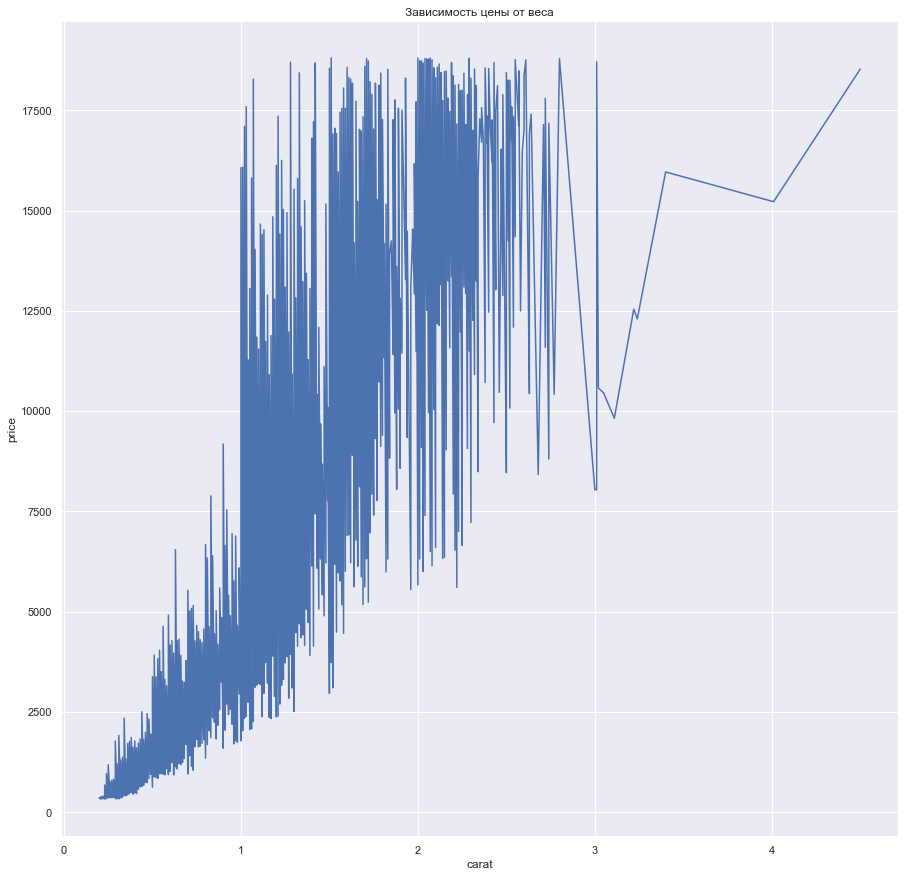

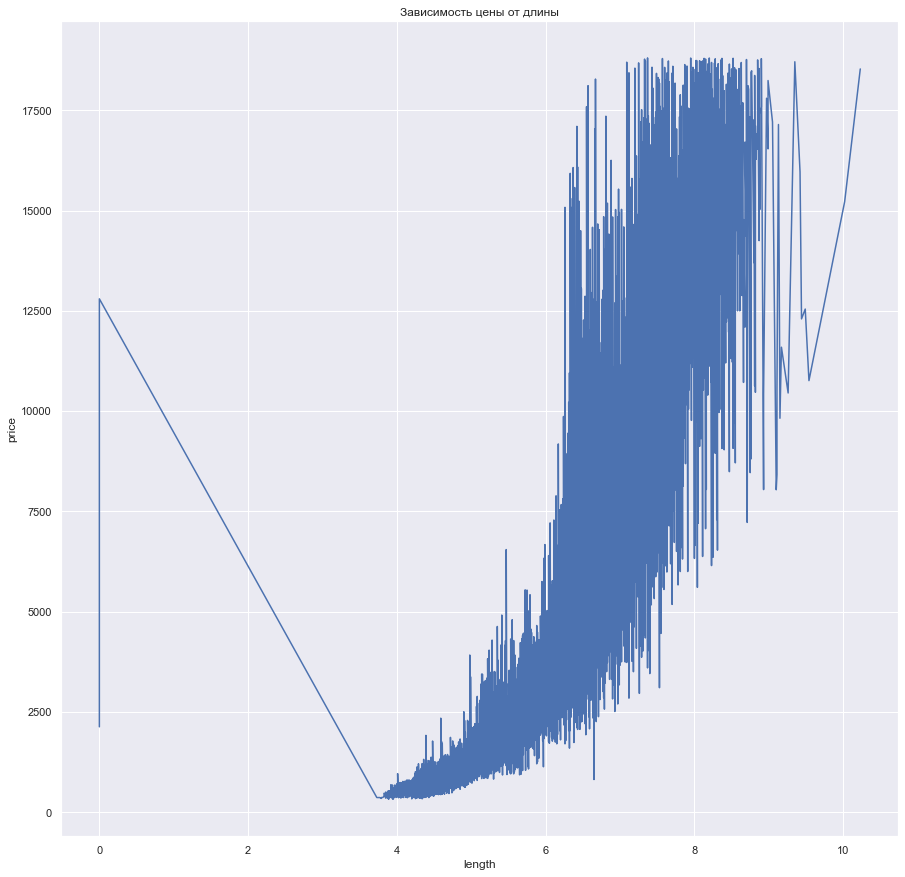

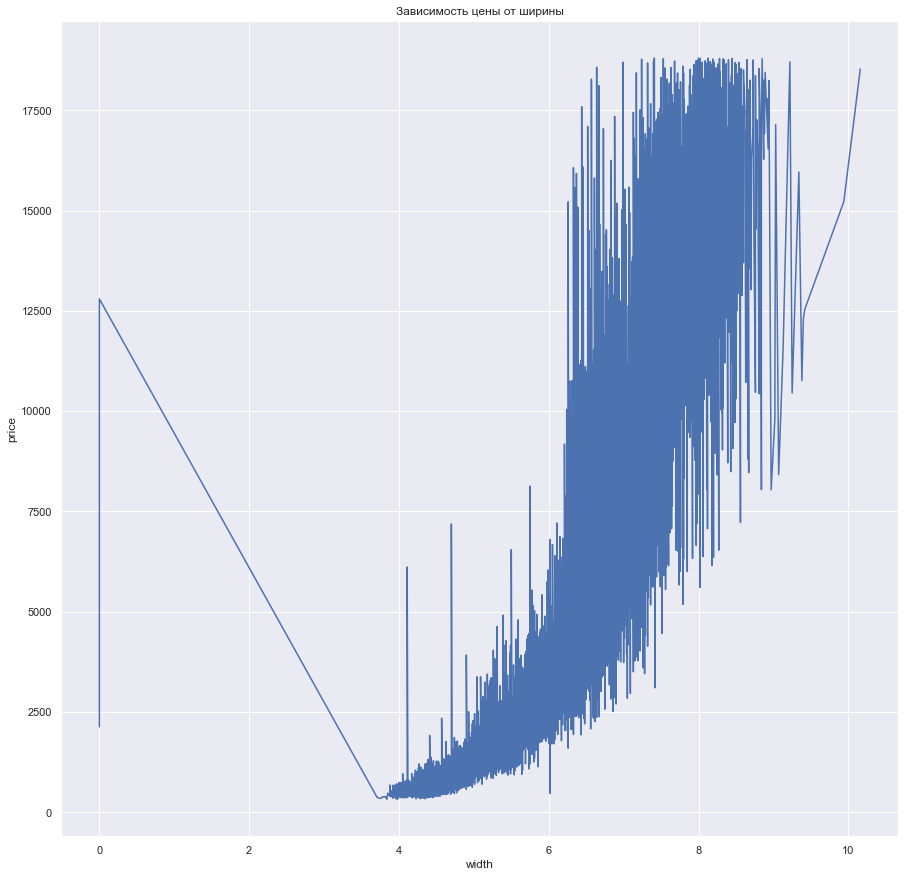

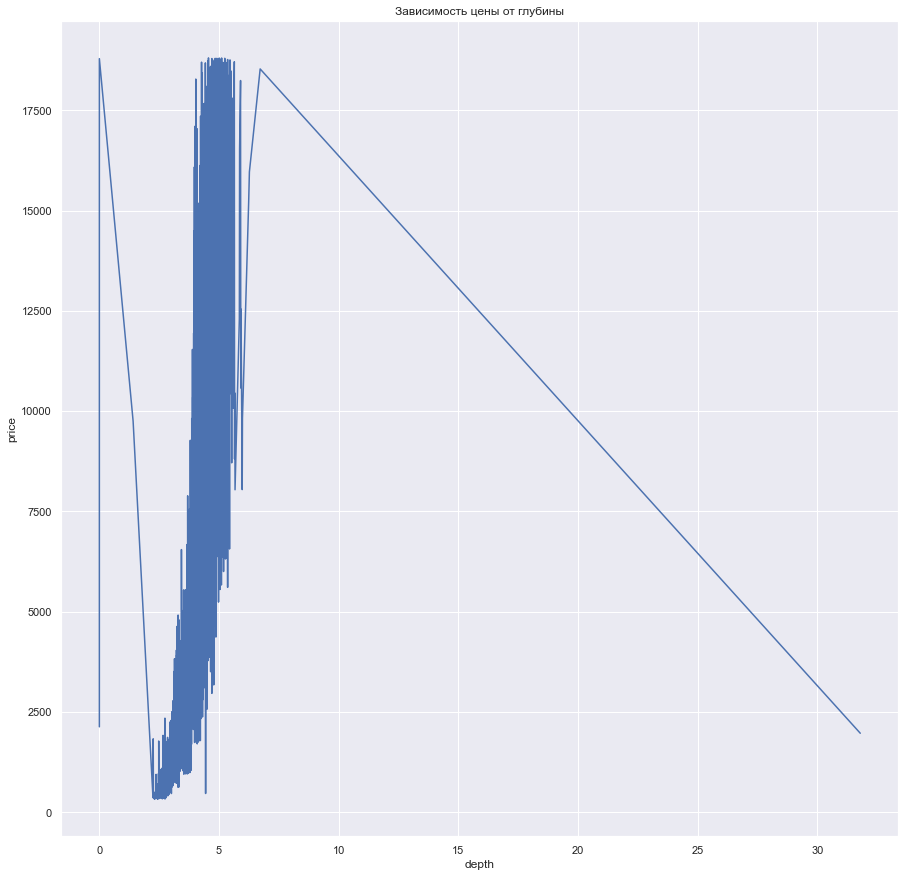

In [798]:
weight_price = np.ndarray((len(Train[:,0]),2))
weight_price[:,0] = [i for i in Train[:,0].astype(float)]
weight_price[:,1] = Train[:,9].astype(float).copy()
weight_price = weight_price[np.lexsort((weight_price[:,1], weight_price[:,0]))]
plt.figure(1)
plt.figure(figsize = (15,15))
plt.title('Price dependence on weight')
plt.xlabel('carat')
plt.ylabel('price')
plt.scatter(weight_price[:,0], weight_price[:,1])

length_price = np.ndarray((len(Train[:,0]),2))
length_price[:,0] = Train[:,6].astype(float).copy()
length_price[:,1] = Train[:,9].astype(float).copy()
length_price = length_price[np.lexsort((length_price[:,1], length_price[:,0]))]
plt.figure(2)
plt.figure(figsize = (15,15))
plt.title('Price dependence on length')
plt.xlabel('length')
plt.ylabel('price')
plt.scatter(length_price[:,0], length_price[:,1])

width_price = np.ndarray((len(Train[:,0]),2))
width_price[:,0] = Train[:,7].astype(float).copy()
width_price[:,1] = Train[:,9].astype(float).copy()
width_price = width_price[np.lexsort((width_price[:,1], width_price[:,0]))]
plt.figure(3)
plt.figure(figsize = (15,15))
plt.title('Price dependence on width')
plt.xlabel('width')
plt.ylabel('price')
plt.scatter(width_price[:,0], width_price[:,1])

depth_price = np.ndarray((len(Train[:,0]),2))
depth_price[:,0] = Train[:,8].astype(float).copy()
depth_price[:,1] = Train[:,9].astype(float).copy()
depth_price = depth_price[np.lexsort((depth_price[:,1], depth_price[:,0]))]
plt.figure(4)
plt.figure(figsize = (15,15))
plt.title('Price dependence on depth')
plt.xlabel('depth')
plt.ylabel('price')
plt.scatter(depth_price[:,0], depth_price[:,1])

Think about what function can be applied to the features so that the dependence of the target variable on them looks more like a linear one?

You can raise them to some even degree, for example, to a square, and the carats and the length and width are raised to a lesser degree, approximately the same, and the depth is greater

**9.** In one figure, draw a plot of the dependence of the target variable on the depth attribute and a plot of the dependence of the target variable on the table attribute. Is it true that it will be enough for the model to leave only one of these features? Make sure of this by drawing similar plots of the dependence of depth and table features on other numeric features.

Text(0.5, 1.0, 'Зависимость ширины')

<Figure size 2210.4x2179.44 with 0 Axes>

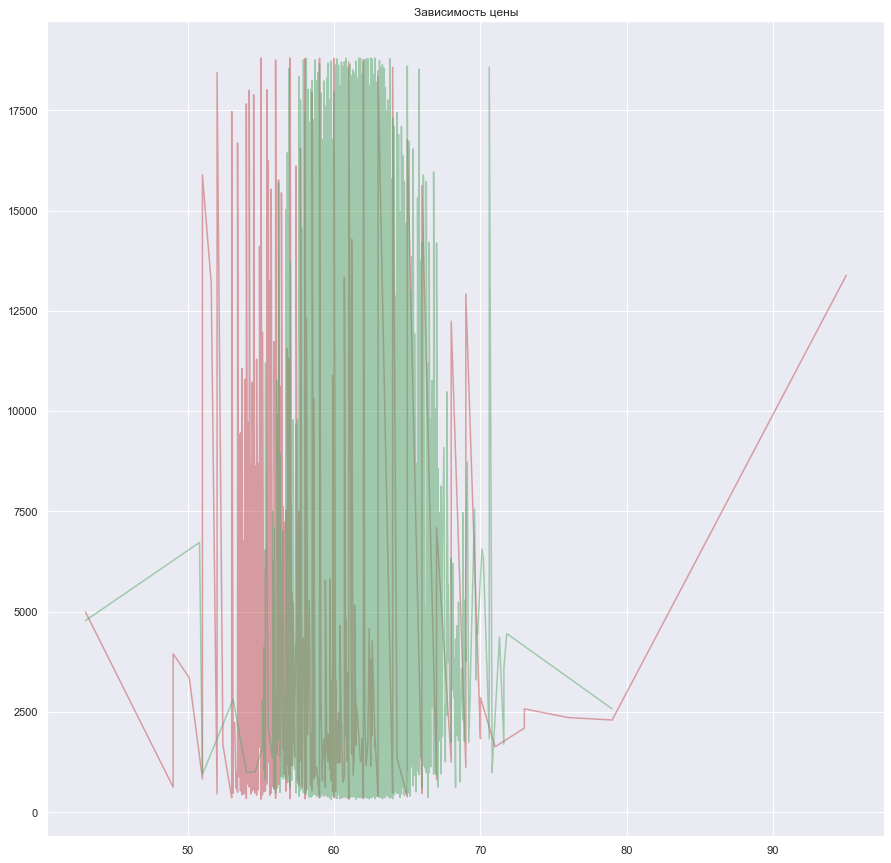

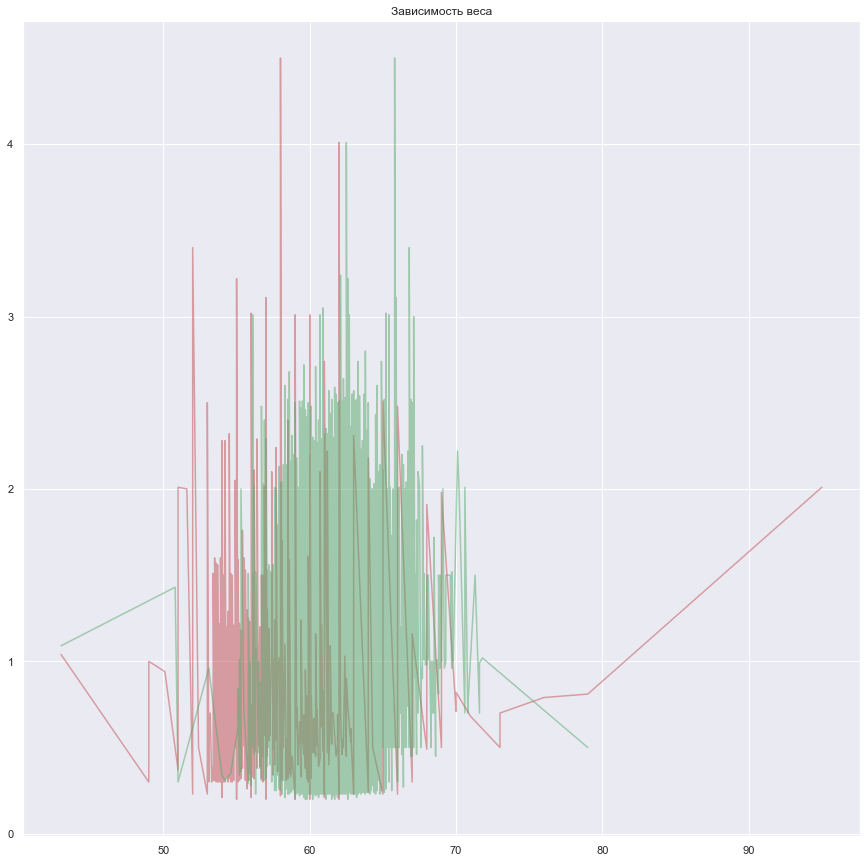

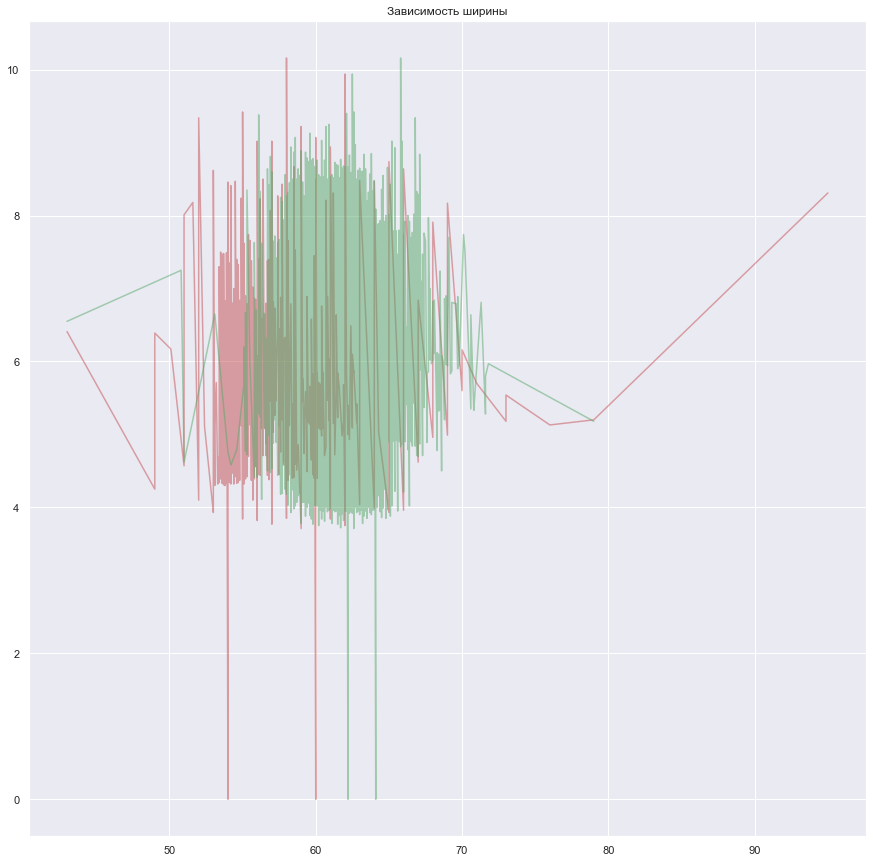

In [799]:
percent_depth_price = np.ndarray((len(Train[:,0]),2))
percent_depth_price[:,0] = Train[:,4].astype(float).copy()
percent_depth_price[:,1] = Train[:,9].astype(float).copy()
percent_depth_price = percent_depth_price[np.lexsort((percent_depth_price[:,1], percent_depth_price[:,0]))]

table_price = np.ndarray((len(Train[:,0]),2))
table_price[:,0] = Train[:,5].astype(float).copy()
table_price[:,1] = Train[:,9].astype(float).copy()
table_price = table_price[np.lexsort((table_price[:,1], table_price[:,0]))]

plt.figure(1)
plt.figure(figsize = (15,15))
plt.scatter(table_price[:,0], table_price[:,1], 'r', percent_depth_price[:,0], percent_depth_price[:,1], 'g',alpha = 0.5)
plt.title('Price dependence')

percent_depth_carat = np.ndarray((len(Train[:,0]),2))
percent_depth_carat[:,0] = Train[:,4].astype(float).copy()
percent_depth_carat[:,1] = Train[:,0].astype(float).copy()
percent_depth_carat = percent_depth_carat[np.lexsort((percent_depth_carat[:,1], percent_depth_carat[:,0]))]

table_carat = np.ndarray((len(Train[:,0]),2))
table_carat[:,0] = Train[:,5].astype(float).copy()
table_carat[:,1] = Train[:,0].astype(float).copy()
table_carat = table_carat[np.lexsort((table_carat[:,1], table_carat[:,0]))]

plt.figure(2)
plt.figure(figsize = (15,15))
plt.scatter(table_carat[:,0], table_carat[:,1], 'r', percent_depth_carat[:,0], percent_depth_carat[:,1], 'g',alpha = 0.5)
plt.title('Weight dependence')


percent_depth_width = np.ndarray((len(Train[:,0]),2))
percent_depth_width [:,0] = Train[:,4].astype(float).copy()
percent_depth_width [:,1] = Train[:,7].astype(float).copy()
percent_depth_width  = percent_depth_width [np.lexsort((percent_depth_width [:,1], percent_depth_width [:,0]))]

table_width  = np.ndarray((len(Train[:,0]),2))
table_width [:,0] = Train[:,5].astype(float).copy()
table_width [:,1] = Train[:,7].astype(float).copy()
table_width  = table_width [np.lexsort((table_width [:,1], table_width [:,0]))]

plt.figure(3)
plt.figure(figsize = (15,15))
plt.scatter(table_width [:,0], table_width [:,1], 'r', percent_depth_width [:,0], percent_depth_width [:,1], 'g',alpha = 0.5)
plt.title('Width dependence')


It would seem that we are trying to come up with new features here to improve the model, why should we throw out the existing features? The fact is that if there are "similar" features in the sample in some sense, then a model trained on such data may give a worse result than if there were no similar features in the sample. Let's demonstrate this phenomenon in practice.

**10.** Train a linear model predicting the price of diamonds on the signs x, y, z from our data. Measure the quality of the resulting linear model on a test sample, then add the attribute $\tau = \frac{x}{2} + 4y - z + 1$, and train the linear model again. Which of the models achieved the best quality?

In [800]:
X_value = np.concatenate((np.ones((len(Train[:,1]),1)),Train[:,[6,7,8]].astype(float)),axis = 1)
Y_value = Train[:,numeric_features[6]].astype(float)
X_t = X_value.transpose()
X_1 = np.linalg.inv(X_t.dot(X_value))
A = (X_1.dot(X_t)).dot(Y_value)

print(A.reshape(-1,1).T)
A_t = A.reshape(-1,1)

error = 0
for i in range(len(X_value[:,1])):
    value =  X_value[i,:].dot(A_t)
    error += (value - Y_value[i]) **2
error = error/len(Y_value)
print(error)


temp = Train[:,[6,7,8]].astype(float).copy()
new = temp[:,0] * 0.5 + 4 * temp[:,1] - temp[:,2] + 1
n = np.ndarray((len(X_value[:,0]),1))
n[:,0] = new
X_value = np.concatenate((X_value,n), axis = 1)

X_t = X_value.transpose()
X_1 = np.linalg.inv(X_t.dot(X_value))
A = (X_1.dot(X_t)).dot(Y_value)

print(A.reshape(-1,1).T)
A_t = A.reshape(-1,1)


X_test = np.concatenate((np.ones((len(Test[:,1]),1)),Test[:,[6,7,8]].astype(float)),axis = 1)
Y_test = Test[:,numeric_features[6]].astype(float)
temp = Test[:,[6,7,8]].astype(float).copy()
new = temp[:,0] * 0.5 + 4 * temp[:,1] - temp[:,2] + 1
n = np.ndarray((len(X_test[:,0]),1))
n[:,0] = new
X_test = np.concatenate((X_test,n), axis = 1)

error = 0
for i in range(len(X_test[:,1])):
    value =  X_test[i,:].dot(A_t)
    error += (value - Y_test[i]) **2
error = error/len(Y_test)
print(error)

[[-14331.48048792   -304.09841607   3414.5465637     120.18592392]]
[3420589.39817818]
[[-14477.95932074  -1500.59229415  -8045.36632774   2895.5924541
    2735.84507836]]
[5985417.36601273]


Explain why the presence of similar features in the sample significantly worsens the quality produced by the linear model?

Since there are almost linearly dependent columns in the matrix X, it follows that the measure of degeneracy of the matrix X.t * X will be high, that is, the determinant will be close to zero, respectively, the determinant of the inverse matrix will be very large, therefore the resulting coefficients will also be large, and since the data is fed with noise, our the model will react too strongly to the slightest changes in the data, which is bad

So, we discussed on the basis of what considerations it is possible to choose transformations over existing features and when it may be more useful for the model to throw out some feature from the sample than to leave it. Now let's come up with a completely new feature. To do this, let's look again at such characteristics of diamonds as length, width and depth. These characteristics are undoubtedly important for predicting the price of diamonds, and all the models we built found some kind of pattern, but now let's try to combine them in a new feature `volume`. To begin with, we will assume that the volume of a diamond is well approximated by the volume of a parallelepiped with the same dimensions.

**11.** Train a linear model on 4 features: x, y, z, and the volume of a parallelepiped with sides (x, y, z). Compare the quality of the resulting model with the quality given by the model trained on the signs x, y, z.

In [801]:
X_value = np.concatenate((np.ones((len(Train[:,1]),1)),Train[:,[6,7,8]].astype(float)),axis = 1)
Y_value = Train[:,numeric_features[6]].astype(float)
X_t = X_value.transpose()
X_1 = np.linalg.inv(X_t.dot(X_value))
A = (X_1.dot(X_t)).dot(Y_value)

print(A.reshape(-1,1).T)
A_t = A.reshape(-1,1)

error = 0
for i in range(len(Y_value)):
    value =  X_value[i,:].dot(A_t)
    error += (value - Y_value[i]) **2
error = error/len(Y_value)
print(error)

Volume = np.ndarray((len(Train[:,1]),1))
Volume [:,0] = [Train[i][6].astype(float) * Train[i][7].astype(float) * Train[i][8].astype(float) for i in range(len(Train[:,1]))]
X_volume = np.concatenate((X_value,Volume), axis = 1)

X_t = X_volume.transpose()
X_1 = np.linalg.inv(X_t.dot(X_volume))
A = (X_1.dot(X_t)).dot(Y_value)

print(A.reshape(-1,1).T)
A_t = A.reshape(-1,1)


X_test = np.concatenate((np.ones((len(Test[:,1]),1)),Test[:,[6,7,8]].astype(float)),axis = 1)
Y_test = Test[:,numeric_features[6]].astype(float)
Volume = np.ndarray((len(Test[:,1]),1))
Volume [:,0] = [Test[i][6].astype(float) * Test[i][7].astype(float) * Test[i][8].astype(float) for i in range(len(Test[:,1]))]
X_test = np.concatenate((X_test,Volume), axis = 1)

error = 0
for i in range(len(Y_test)):
    value =  X_test[i,:].dot(A_t)
    error += (value - Y_test[i]) **2
error = error/len(Y_test)
print(error)

[[-14331.48048792   -304.09841607   3414.5465637     120.18592392]]
[3420589.39817818]
[[ 3866.34960829 -2592.03645137  2228.82183539 -2022.46260583
     71.6796085 ]]
[13664460.47531836]


It is clear that diamonds rarely look like perfect parallelepipeds (although, of course, a lot depends on the cut), and more often there are diamonds whose shape rather resembles an ellipsoid. Train the linear model again on 4 features: x, y, z and the volume of an ellipsoid with axes (x, y, z).

In [802]:
Volume = np.ndarray((len(Train[:,1]),1))
Volume [:,0] = [Train[i][6].astype(float)/2 * Train[i][7].astype(float)/2 * Train[i][8].astype(float)/2 * 4/3 * math.pi for i in range(len(Train[:,1]))]
X_volume = np.concatenate((X_value,Volume), axis = 1)

X_t = X_volume.transpose()
X_1 = np.linalg.inv(X_t.dot(X_volume))
A = (X_1.dot(X_t)).dot(Y_value)

print(A.reshape(-1,1).T)
A_t = A.reshape(-1,1)

error = 0

X_test[:,-1] = [Test[i][6].astype(float)/2 * Test[i][7].astype(float)/2 * Test[i][8].astype(float)/2 * 4/3 * math.pi for i in range(len(Test[:,1]))]
for i in range(len(Y_test)):
    value =  X_test[i,:].dot(A_t)
    error += (value - Y_test[i]) **2
error = error/len(Y_test)
print(error)



[[ 3866.3496083  -2592.03645139  2228.8218354  -2022.46260583
    136.89796814]]
[13664460.47537107]


The next trick that we will discuss is the binarization of features. The point is that we take some feature from the sample and make several binary features out of it (i.e. such features whose values can be either $0$ or $1$). 

Let's say $P$ is a numeric attribute, then, for example, we can choose $k$ thresholds ${t_1, \ldots, t_k}$ and turn the $P$ attribute into $k$ binary features $[P\leq t_1], [t_1<P\leq t_2], \ldots, [t_{k-1} < P\leq t_k]$.

If we have two signs $P$ and $F$, we can apply Boolean operations to their binarizations, for example $[P < t_1 \vee F > h_1], [t_2 <P \leq t_3 \wedge h_2 \leq F \leq h_3], [(P=t_4 \vee F = h_4) \wedge P\leq t_5]$, etc.

Let's use binarization to select objects whose price is likely to be high, and objects whose price is likely to be low. We will do this on the basis of categorical features . 

**12.** Train a linear model that predicts the price of diamonds based on categorical features from our data. Measure the quality of the resulting linear model on a test sample, then add features that will clearly highlight diamonds, the price of which is likely to be high, and diamonds, the price of which is likely to be low, and train the linear model again. You can also add your own attributes and use not only categorical attributes.

In [803]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
cut = ['0','Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
cut_cost = [0,1,2,3,4,5]
color = ['0','J','I','H','G','F','E','D']
color_cost = [0,1,2,3,4,5,6,7]
clarity = ['0','I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
clarity_cost = [0,1,2,3,4,5,6,7,8]
X_value = np.concatenate((np.ones((len(Train[:,1]),1)),Train[:,categorical_features[:3]]),axis = 1)
Expensive = np.zeros((len(Train[:,1]),3))
Chip = np.zeros((len(Train[:,1]),3))
for i in range(len(Train[:,1])):
            X_value[i][1] = cut_cost[int(cut.index(X_value[i][1]))]
            X_value[i][2] = color_cost[int(color.index(X_value[i][2]))]
            X_value[i][3] =clarity_cost[int(clarity.index(X_value[i][3]))]
            good_cut = int(X_value[i][1]) >= cut_cost[-2]
            bad_cut = int(X_value[i][1]) <= cut_cost[2]
            good_color = int(X_value[i][2]) >= color_cost[-2]
            bad_color = int(X_value[i][2]) <= color_cost[2]
            good_clarity = int(X_value[i][3]) >= clarity_cost[-2]
            bad_clarity = int(X_value[i][3]) <= clarity_cost[2]
            if(good_cut and (not bad_clarity) and (not bad_color)):
                Expensive[i][0] = 1
            if(bad_cut and (not good_clarity) and (not good_clarity)):
                Chip[i][0] = 1
            if(good_color and (not bad_clarity) and (not bad_cut)):
                Expensive[i][1] = 1
            if(bad_color and (not good_clarity) and (not good_cut)):
                Chip[i][1] = 1
            if(good_clarity and (not bad_cut) and (not bad_color)):
                Expensive[i][2] = 1
            if(bad_clarity and (not good_cut) and (not good_clarity)):
                Chip[i][2] = 1
Y_value = Train[:,numeric_features[6]].astype(float)
X_value = X_value.astype(float)
X_value = np.concatenate((X_value,Expensive,Chip), axis = 1)
X_t = X_value.transpose()

X_1 = np.linalg.inv(X_t.dot(X_value))
A = (X_1.dot(X_t)).dot(Y_value)

print(A.reshape(-1,1).T)
A_t = A.reshape(-1,1)


X_test = np.concatenate((np.ones((len(Test[:,1]),1)),Test[:,categorical_features[:3]]),axis = 1)
Expensive_test = np.zeros((len(Test[:,1]),3))
Chip_test = np.zeros((len(Test[:,1]),3))
for i in range(len(Test[:,1])):
            X_test[i][1] = cut_cost[int(cut.index(X_test[i][1]))]
            X_test[i][2] = color_cost[int(color.index(X_test[i][2]))]
            X_test[i][3] =clarity_cost[int(clarity.index(X_test[i][3]))]
            good_cut = int(X_test[i][1]) >= cut_cost[-2]
            bad_cut = int(X_test[i][1]) <= cut_cost[2]
            good_color = int(X_test[i][2]) >= color_cost[-2]
            bad_color = int(X_test[i][2]) <= color_cost[2]
            good_clarity = int(X_test[i][3]) >= clarity_cost[-2]
            bad_clarity = int(X_test[i][3]) <= clarity_cost[2]
            if(good_cut and (not bad_clarity) and (not bad_color)):
                Expensive_test[i][0] = 1
            if(bad_cut and (not good_clarity) and (not good_clarity)):
                Chip_test[i][0] = 1
            if(good_color and (not bad_clarity) and (not bad_cut)):
                Expensive_test[i][1] = 1
            if(bad_color and (not good_clarity) and (not good_cut)):
                Chip_test[i][1] = 1
            if(good_clarity and (not bad_cut) and (not bad_color)):
                Expensive_test[i][2] = 1
            if(bad_clarity and (not good_cut) and (not good_clarity)):
                Chip_test[i][2] = 1
Y_test = Test[:,numeric_features[6]].astype(float)
X_test = X_test.astype(float)
X_test = np.concatenate((X_test,Expensive_test,Chip_test), axis = 1)

error = 0
for i in range(len(Y_test)):
    value =  X_test[i,:].dot(A_t)
    error += (value - Y_test[i]) **2
error = error/len(Y_test)
print(error)


X_test1 = np.concatenate((np.ones((len(data_test[:,1]),1)),data_test[:,categorical_features[:3]]),axis = 1)
Expensive_test1 = np.zeros((len(data_test[:,1]),3))
Chip_test1 = np.zeros((len(data_test[:,1]),3))
for i in range(len(data_test[:,1])):
            X_test1[i][1] = cut_cost[int(cut.index(X_test1[i][1]))]
            X_test1[i][2] = color_cost[int(color.index(X_test1[i][2]))]
            X_test1[i][3] =clarity_cost[int(clarity.index(X_test1[i][3]))]
            good_cut = int(X_test1[i][1]) >= cut_cost[-2]
            bad_cut = int(X_test1[i][1]) <= cut_cost[2]
            good_color = int(X_test1[i][2]) >= color_cost[-2]
            bad_color = int(X_test1[i][2]) <= color_cost[2]
            good_clarity = int(X_test1[i][3]) >= clarity_cost[-2]
            bad_clarity = int(X_test1[i][3]) <= clarity_cost[2]
            if(good_cut and (not bad_clarity) and (not bad_color)):
                Expensive_test1[i][0] = 1
            if(bad_cut and (not good_clarity) and (not good_clarity)):
                Chip_test1[i][0] = 1
            if(good_color and (not bad_clarity) and (not bad_cut)):
                Expensive_test1[i][1] = 1
            if(bad_color and (not good_clarity) and (not good_cut)):
                Chip_test1[i][1] = 1
            if(good_clarity and (not bad_cut) and (not bad_color)):
                Expensive_test1[i][2] = 1
            if(bad_clarity and (not good_cut) and (not good_clarity)):
                Chip_test1[i][2] = 1

[[ 7.91373951e+03 -2.37758863e+02 -3.54972582e+02 -3.36405297e+02
   1.05147583e+02 -4.14713175e+02 -2.54380822e-01 -6.70429262e+02
  -7.75226394e+01 -2.70127971e+01]]
[14837616.38457836]


In [804]:
from queue import Queue
def add_polynomial_features(features, degree):
  if(degree == 1):
    return features
  deg = np.zeros(len(features[:,1]))
  q = Queue()
  v = []
  for i in range(len(features[:,1])):
    temp = deg.copy()
    temp[i] = 1
    q.put([temp,i,1,1])
  count = len(features[:,1])
  v = q.get()
  count -= 1

  while(v[2] < degree):
    for i in range(v[1],len(features[:,1])):
      kolvo = 1
      if(i == v[1]):
        kolvo = 0
      temp = v[0].copy()
      temp[i] += 1
      q.put([temp,i,v[2] + 1,v[3] + kolvo])
      count += 1
    v = q.get()
    count -= 1

  q.put(v)
  count += 1
  
  poly = np.ones((len(features[1,:]),count)) 
  k = 0
  while(not q.empty()):
    v = q.get()
    for i in range(len(v[0])):
        temp = np.power(features[i,:],v[0][i])
        poly[:,k] = [temp[j] * poly[j][k] for j in range(len(features[1,:]))]
    k += 1
  return poly.T

In [805]:
for i in range(len(X_x[:,1])):
    X_x[i][18] = X_x[i][18] ** 1
    X_x[i][21] = X_x[i][21] ** 1
    X_x[i][22] = X_x[i][22] ** 1
    X_x[i][23] = X_x[i][23] ** 1
X1 = X_x[:,:20]
X2 = X_x[:,20:]
poly_features = add_polynomial_features(Train[:, [0,5]].astype(np.float64).T, 2)
X_value = np.concatenate((X1,X2,poly_features.T),axis = 1)

Y_value = Train[:,numeric_features[6]].astype(float)
X_t = X_value.transpose()
X_1 = np.linalg.inv(X_t.dot(X_value))
A = (X_1.dot(X_t)).dot(Y_value)

print(A.reshape(-1,1).T)
A_t = A.reshape(-1,1)


for i in range(len(X_test_bool[:,1])):
    X_test_bool[i][18] = X_test_bool[i][18] ** 1
    X_test_bool[i][21] = X_test_bool[i][21] ** 1
    X_test_bool[i][22] = X_test_bool[i][22] ** 1
    X_test_bool[i][23] = X_test_bool[i][23] ** 1
X1_test = X_test_bool[:,:20]
X2_test = X_test_bool[:,20:]
poly_features_test = add_polynomial_features(Test[:, [0,5]].astype(np.float64).T, 2)
X_test = np.concatenate((X1_test,X2_test,poly_features_test.T),axis = 1)
Y_test = Test[:,numeric_features[6]].astype(float)
error = 0
for i in range(len(Y_test)):
    value =  X_test[i,:].dot(A_t)
    error += (value - Y_test[i]) **2
error = error/len(Y_test)
print(error)


Ones = np.ones((len(data_test[:,1]),1))
Zero = np.zeros((len(data_test[:,1]),len(categories)-1))
X_test = np.concatenate((Ones,Zero),axis = 1)
k = 0
while k < len(data_test[:,1]):
    value = 0
    for j in data_test[k,categorical_features[:3]]:
        index = categories.index(j)
        X_test[k][index] = 1
    k += 1
X_test = X_test.astype(int)
X_test = X_test[:,number]
poly_features_test = add_polynomial_features(data_test[:, [0,5]].astype(np.float64).T, 2)
X_test_bool1 = np.concatenate((X_test,data_test[:,numeric_features[:6]].astype(float)), axis = 1)
for i in range(len(X_test_bool[:,1])):
    X_test_bool1[i][18] = X_test_bool1[i][18] ** 1
    X_test_bool1[i][21] = X_test_bool1[i][21] ** 1
    X_test_bool1[i][22] = X_test_bool1[i][22] ** 1
    X_test_bool1[i][23] = X_test_bool1[i][23] ** 1
X1_test = X_test_bool1[:,:20]
X2_test = X_test_bool1[:,20:]
X_test = np.concatenate((X1_test,X2_test,poly_features_test.T),axis = 1)

ANS = X_test.dot(A_t)
for i in range(len(ANS)):
    ANS[i] = max(350,ANS[i])


[[ 2.05081814e+04 -8.24393392e+02 -2.42486822e+02 -1.59823151e+02
  -4.50723442e+01 -2.42804853e+03 -1.47819603e+03 -9.95689628e+02
  -5.06641939e+02 -2.81280767e+02 -2.25280917e+02 -5.31010715e+03
  -2.65487356e+03 -1.70808937e+03 -1.12646714e+03 -7.92639697e+02
  -4.37093109e+02 -3.48134119e+02  1.95538532e+04 -1.21861877e+02
  -2.09113924e+02 -2.69316820e+03  4.15024895e+02 -6.38316247e+01
  -5.47833844e+01  1.85393124e+00 -9.97218964e+02]]
[1261528.57612669]


### Regularization 

Of course, no one guarantees that the variable being explained depends on the other characteristics linearly, so we can improve the model a little by adding nonlinear features to it based on existing ones. One of the most common approaches is to add polynomial features of some fixed degree to the sample based on those already available. I.e., say we have features {P, F, G} and our task is to add polynomial features of degree $2$ to the sample based on those available. Then we will add the following features to the selection

$$
P^2, F^2, G^2, PF, PG, FG.
$$

Similarly for a larger number of features and larger degrees.

**1.** Implement the function `add_polynomial_features`, which takes an array of features, and a degree, and returns polynomial features of a given degree.

In [807]:
from queue import Queue
def add_polynomial_features(features, degree):
  """
    features: массив признаков
    degree:   показатель степени
  """
  if(degree == 1):
    return features
  deg = np.zeros(len(features[:,1]))
  q = Queue()
  v = []
  for i in range(len(features[:,1])):
    temp = deg.copy()
    temp[i] = 1
    q.put([temp,i,1,1])
  count = len(features[:,1])
  v = q.get()
  count -= 1

  while(v[2] < degree):
    for i in range(v[1],len(features[:,1])):
      kolvo = 1
      if(i == v[1]):
        kolvo = 0
      temp = v[0].copy()
      temp[i] += 1
      q.put([temp,i,v[2] + 1,v[3] + kolvo])
      count += 1
    v = q.get()
    count -= 1

  q.put(v)
  count += 1
  
  poly = np.ones((len(features[1,:]),count)) 
  k = 0
  while(not q.empty()):
    v = q.get()
    for i in range(len(v[0])):
        temp = np.power(features[i,:],v[0][i])
        poly[:,k] = [temp[j] * poly[j][k] for j in range(len(features[1,:]))]
    k += 1
  return poly.T
# Example: we obtain polynomial signs of degree 2 based on signs x, y, z:
poly_features = add_polynomial_features(data[:, [6, 7, 8]].astype(np.float64).T, 2)
assert poly_features.shape[0] == 6 

Train a linear model by adding polynomial features of degree $2$ from the features of carat and table to the sample.

In [808]:
poly_features = add_polynomial_features(Train[:, [0,5]].astype(np.float64).T, 2)
X_with_poly_2 = np.concatenate((X_x,poly_features.T),axis = 1)
Y_value = Train[:,numeric_features[6]].astype(float)
X_t = X_with_poly_2.transpose()
X_1 = np.linalg.inv(X_t.dot(X_with_poly_2))
A = (X_1.dot(X_t)).dot(Y_value)

print(A.reshape(-1,1).T)
A_t = A.reshape(-1,1)


poly_features_test = add_polynomial_features(Test[:, [0,5]].astype(np.float64).T, 2)
X_with_poly_2_test = np.concatenate((X_test_bool,poly_features_test.T),axis = 1)
Y_test = Test[:,numeric_features[6]].astype(float)
error = 0
for i in range(len(Y_test)):
    value =  X_with_poly_2_test[i,:].dot(A_t)
    error += (value - Y_test[i]) **2
error = error/len(Y_test)
print(error)


[[ 2.05081814e+04 -8.24393392e+02 -2.42486822e+02 -1.59823151e+02
  -4.50723442e+01 -2.42804853e+03 -1.47819603e+03 -9.95689628e+02
  -5.06641939e+02 -2.81280767e+02 -2.25280917e+02 -5.31010715e+03
  -2.65487356e+03 -1.70808937e+03 -1.12646714e+03 -7.92639697e+02
  -4.37093109e+02 -3.48134119e+02  1.95538532e+04 -1.21861877e+02
  -2.09113924e+02 -2.69316820e+03  4.15024895e+02 -6.38316247e+01
  -5.47833844e+01  1.85393124e+00 -9.97218964e+02]]
[1261528.57612669]


So, we learned that it is possible to add polynomial features from already existing numerical features to the sample and sometimes this leads to a significant increase in quality. A natural question arises: why not reduce the task of constructing a linear model to the selection of the degree of polynomial features? Surely it is possible to find such a degree at which the model will produce the best possible quality? Let's explore this question.

**2.** In this task, you need to train 6 linear models on polynomial features of degrees from 1 to 6 from already existing features (carat, x, y, z). Draw a graph of the dependence of the quality of the model on the training and test samples on the degree of polynomial features on a logarithmic scale. Comment on the resulting graph: did you expect such an effect?

[14.660319331643464, 14.586758227789757, 14.53014134064029, 14.474156628740637, 25.85152212192655, 30.471979480889498]
[15.308788626933692, 22.388904282729786, 27.979056992297604, 39.38571889885536, 47.756131794172006, 54.80103595710312]


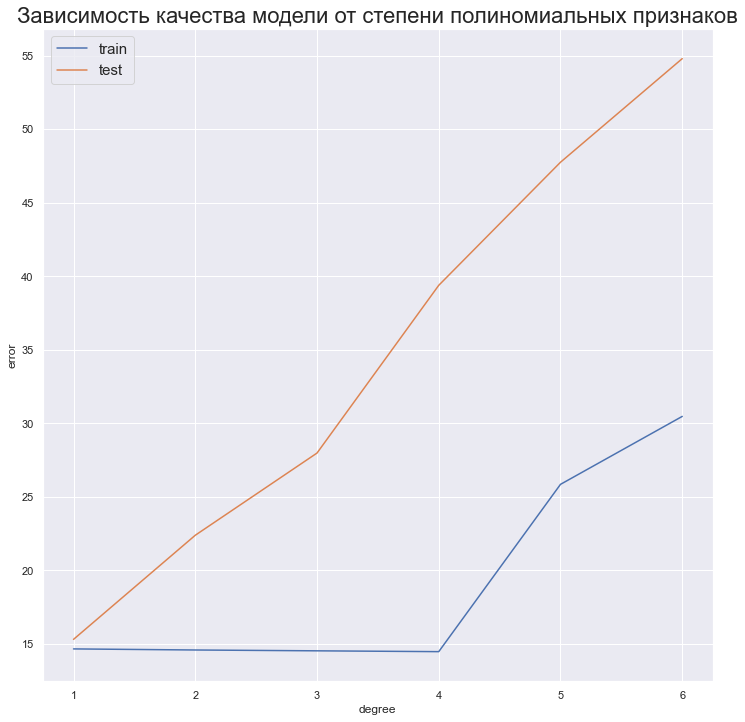

In [809]:
errors_train = []
errors_test = []
Y_value = Train[:,numeric_features[6]].astype(float)
Y_test = Test[:,numeric_features[6]].astype(float)
for j in range(1,7):
    polynom = add_polynomial_features(Train[:, [0,6,7,8]].astype(np.float64).T, j)
    X_value = polynom.T
    X_t = X_value.transpose()
    X_1 = np.linalg.inv((X_t.dot(X_value)))
    A = (X_1.dot(X_t)).dot(Y_value)
    A_t = A.reshape(-1,1)
    error = 0
    for i in range(len(Y_value)):
        value =  X_value[i,:].dot(A_t)
        error += (value - Y_value[i]) **2
    error = error/len(Y_value)
    errors_train.append(math.log(error))

    polynom_test = add_polynomial_features(Test[:, [0,6,7,8]].astype(np.float64).T, j)
    X_test = polynom_test.T
    error = 0
    for i in range(len(Y_test)):
        value =  X_test[i,:].dot(A_t)
        error += (value - Y_test[i]) **2
    error = error/len(Y_test)
    errors_test.append(math.log(error))
print(errors_train)
print(errors_test)
x = np.arange(1,7)
width = 0.4
plt.figure(figsize = (12,12))
plt.title('Dependence of the model quality on the degree of polynomial features',fontsize = 22)
plt.xlabel('degree')
plt.ylabel('error')
p = plt.plot(x,errors_train)
p = plt.plot(x,errors_test)
plt.legend(['train','test'],fontsize = 15)
plt.show()

The effect you are observing is called overfitting: a situation where the model becomes too dependent on the training sample. Indeed, in the process of training the model, we try to minimize the error on the training sample, and it is not at all obvious why the trained model will generalize to objects that it has not seen before.

When we started adding large-scale polynomial features to the sample, the model became so complex that it gained the ability to memorize the training sample instead of extracting some patterns from it. As a result, when we submitted a sample other than the training sample to the model for input, we received a colossal error.

The situation when the quality of the model in the training sample is much lower than the quality in the test sample is the most obvious symptom of retraining, but not the only one. Often, in a situation of retraining, one can observe unusually large modulus coefficients of the model.

There are many ways to fight this evil. One of them is--- regularization. Now we will consider one of its varieties ---**L2-regularization**. The idea is to tweak the matrix $X^TX$, making it "better". For example, this can be done by replacing it with $(X^TX+\lambda E)$, where $\lambda > 0$ is some scalar. Sacrificing accuracy on the training sample, we nevertheless get a numerically more stable pseudo-solution $a =(X^TX+\lambda E)^{-1}X^Ty$ and reduce the effect of retraining. *Hyperparameter * $\lambda$ needs to be selected, and there are no universal ways to do this, but it is often possible to select it so that the error on the test sample falls.

However, there are some rules that should be followed when selecting the regularization coefficient. Usually in such a situation, the entire sample is divided into three parts: training, *validation* and test. First, the value of the hyperparameter is selected according to the validation one, then a model is built according to the training one, and its final quality is evaluated according to the test one. In addition, you need to select $\lambda$ using a logarithmic grid to find out the optimal order of magnitude.

**3.** Think about why it is not worth selecting the regularization coefficient for the training sample? By the test sample?

If we select a coefficient based on the training sample, then the best option (to reduce the error on the training sample) will be a coefficient equal to 0, but on the contrary we want to reduce the accuracy of predictions on the training sample, and increase the accuracy on any data. If we select from a test sample, then we will build a coefficient specifically for the test sample, which is as bad as retraining before

**4.** Consider a linear model with polynomial features of degree $4$ from the features (carat, x, y, z). The quality of such a model in the training sample is already noticeably better than the quality in the test. Let's try to fix this situation by applying $L2$-regularization. Divide your training sample into two parts in the ratio of $8:2$. You will again declare the larger part as a training sample, and the smaller one as a validation sample. Select the hyperparameter $\lambda$ on the logarithmic grid so that the linear model with the "corrected" Gram matrix $X^TX$ gives the best quality on the validation sample. Train a linear model with the selected parameter $\lambda$ on a training sample and test it on test data.

In [810]:
To_train, To_validate = train_test_split(Train, test_size=0.2, random_state=45)
logs = np.logspace(-0.005,0.05,100)
Y_value = To_train[:,numeric_features[6]].astype(float)
polynom = add_polynomial_features(To_train[:, [0,6,7,8]].astype(np.float64).T, 4)
X_value = polynom.T
X_t = X_value.transpose()

polynom_validate = add_polynomial_features(To_validate[:, [0,6,7,8]].astype(np.float64).T, 4)
X_validate = polynom_validate.T
Y_validate = To_validate[:,numeric_features[6]].astype(float)

polynom_test = add_polynomial_features(Test[:, [0,6,7,8]].astype(np.float64).T, 4)
X_test = polynom_test.T
Y_test = Test[:,numeric_features[6]].astype(float)
min_error = 10000000000
best_l = 0
for l in logs:
    temp = np.diag([l] * len(X_value[1,:]))
    X_1 = np.linalg.inv((X_t.dot(X_value)) + temp)
    A = (X_1.dot(X_t)).dot(Y_value)
    A_t = A.reshape(-1,1)
    
    error = 0
    for i in range(len(Y_validate)):
        value =  X_validate[i,:].dot(A_t)
        error += (value - Y_validate[i]) **2
    error = error/len(Y_validate)
    if(error < min_error):
        min_error = error
        best_l = l
print(best_l)

temp = np.diag([best_l] * len(X_value[1,:]))
X_1 = np.linalg.inv((X_t.dot(X_value)) + temp)
A = (X_1.dot(X_t)).dot(Y_value)
A_t = A.reshape(-1,1)
    
error = 0
for i in range(len(Y_test)):
    value =  X_test[i,:].dot(A_t)
    error += (value - Y_test[i]) **2
error = error/len(Y_test)
print(error)


1.1220184543019633
[1.49850388e+10]


**5.** Repeat the first task, but instead of 6 regular linear models, train 6 regularized linear models. For each model, you will need to choose your own hyperparameter $\lambda$.

[14.66338105261705, 14.582655031825183, 14.523271029927777, 14.470509928464619, 14.454727348705305, 19.070397238079472]
[15.333920046735082, 22.088858240843386, 23.308236383445927, 23.430318127170736, 42.33944234357447, 48.861563030982204]


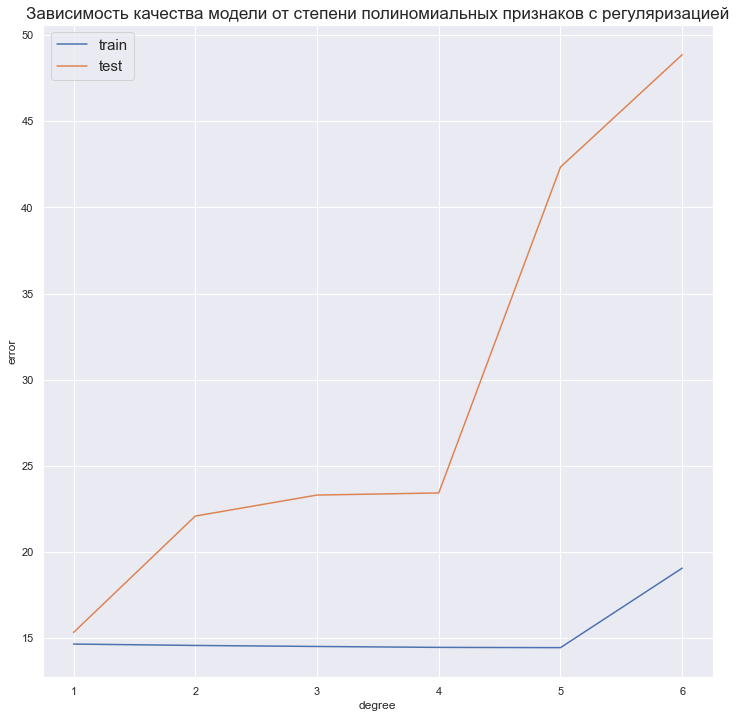

In [811]:
errors_train = []
errors_test = []
Y_value = To_train[:,numeric_features[6]].astype(float)
Y_all_train = Train[:,numeric_features[6]].astype(float)
Y_validate = To_validate[:,numeric_features[6]].astype(float)
Y_test = Test[:,numeric_features[6]].astype(float)
for j in range(1,7):
    polynom = add_polynomial_features(Train[:, [0,6,7,8]].astype(np.float64).T, j)
    X_all_train = polynom.T

    polynom = add_polynomial_features(To_train[:, [0,6,7,8]].astype(np.float64).T, j)
    X_value = polynom.T
    X_t = X_value.transpose()

    polynom_validate = add_polynomial_features(To_validate[:, [0,6,7,8]].astype(np.float64).T, j)
    X_validate = polynom_validate.T

    polynom_test = add_polynomial_features(Test[:, [0,6,7,8]].astype(np.float64).T, j)
    X_test = polynom_test.T
    min_error = 10000000000
    best_l = 0
    for l in logs:
        temp = np.diag([l] * len(X_value[1,:]))
        X_1 = np.linalg.inv((X_t.dot(X_value)) + temp)
        A = (X_1.dot(X_t)).dot(Y_value)
        A_t = A.reshape(-1,1)
    
        error = 0
        for i in range(len(Y_validate)):
            value =  X_validate[i,:].dot(A_t)
            error += (value - Y_validate[i]) **2
        error = error/len(Y_validate)
        if(error < min_error):
            min_error = error
            best_l = l
    temp = np.diag([best_l] * len(X_value[1,:]))
    X_1 = np.linalg.inv((X_t.dot(X_value)) + temp)
    A = (X_1.dot(X_t)).dot(Y_value)
    A_t = A.reshape(-1,1)
    
    error = 0
    for i in range(len(Y_value)):
        value =  X_value[i,:].dot(A_t)
        error += (value - Y_value[i]) **2
    error = error/len(Y_value)
    errors_train.append(math.log(error))


    error = 0
    for i in range(len(Y_test)):
        value =  X_test[i,:].dot(A_t)
        error += (value - Y_test[i]) **2
    error = error/len(Y_test)
    errors_test.append(math.log(error))

print(errors_train)
print(errors_test)
x = np.arange(1,7)
width = 0.4
plt.figure(figsize = (12,12))
plt.title('Dependence of the model quality on the degree of polynomial features with regularization',fontsize = 17)
plt.xlabel('degree')
plt.ylabel('error')
p = plt.plot(x,errors_train)
p = plt.plot(x,errors_test)
plt.legend(['train','test'],fontsize = 15)
plt.show()

**6. [1,15 points]** Let $X\in\text{Mat}_{n\times k}(\mathbb{R})$, $\lambda\geqslant 0$ be given, and it is also known that $\text{rk}~X = k\leqslant n$. Solve the following optimization problem:
$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min\limits_{a \in \mathbb{R}^k}.$$

Note that the first term --- is the mean-square error value (up to multiplication by some constant) of the model with coefficients $a = (a_1, \ldots, a_k)$. A typical linear regression task is to minimize the first term over all vectors $a$. However, in this case, in addition to minimizing the root-mean-square error, we also add the condition that the weights of the model should be as small as possible. Indeed, we have already seen that the more complex the model, the smaller the error on the training sample will be (and it is this error that we minimize in the learning process) and the more likely the model will have large modulo coefficients, which means a large value of $|a|$. By adding the second term to the functional considered above, we seem to set a limit on the absolute value of the coefficients of the model. In this case, the parameter $\lambda$ will clearly indicate how much we will penalize the model for large coefficients. Note that if $\lambda = 0$, then we get the classical linear regression problem without regularization.

$$|Xa - y|^2 + \lambda|a|^2 = |Xa - y|^2 + (|\sqrt{\lambda}a|)^2\rightarrow\min\limits_{a \in \mathbb{R}^k}$$
Consider the standard problem of the least squares method:

  Find the vector ${a}$ for which the length of the difference $|X_{0}a - y_{0}|^2$ is minimal;
  
  Let $$X_{0} = \begin{pmatrix}
  X\\
  \sqrt{{\lambda}}E
  \end{pmatrix}$$
  $$y_{0} = \begin{pmatrix}
  y\\
  0
  \end{pmatrix}$$
  Then $$|X_{0}a - y_{0}|^2 = \begin{vmatrix}
  prediction(x_{1}) - y(x_{1})\\
  prediction(x_{2}) - y(x_{2})\\
  prediction(x_{3}) - y(x_{3})\\
  ...\\
   \sqrt{{\lambda}}a_{1}\\
   \sqrt{{\lambda}}a_{2}\\
   \sqrt{{\lambda}}a_{3}\\
   ...\\
   \end{vmatrix} ^ {2} = (prediction(x_{1}) - y(x_{1}))^{2} + (prediction(x_{2}) - y(x_{2}))^{2} + $$ $$+ 
   (prediction(x_{3}) - y(x_{3}))^{2} + ... + 
{\lambda}(a_{1})^{2} + {\lambda}(a_{2})^{2} + {\lambda}(a_{3})^{2} + ... = $$ $$ =
|Xa - y|^2 + \lambda|a|^2$$
Thus, our task is reduced to solving the least square method problem with new X and y. Note that in $X_{0}$, due to the addition of $\sqrt{{\lambda}}E$, all columns have become linearly independent, hence the determinant of the Gram matrix of the system of vectors-columns of the matrix $X_{0}$ is not equal to 0, which means that the determinant of the matrix $X_{0}^{t}\cdot{X_0}$ is also not equal to 0, hence there is an inverse matrix to this one, which means that the solution to the original optimization problem always exists and is unique:
$$ a = \left(X_{0}^TX_{0}\right)^{-1}X_{0}^Ty_{0}$$
Since the vector $X_{0}a$ is a projection of the vector $y_{0}$ onto the subspace generated by the columns of the matrix $X_{0}$, then the vector $X_{0}a$ is unique, and since this vector is a linear combination of the columns of the matrix X, which are linearly independent, then vector a is the only one.



**7.** When constructing a linear model, you usually also have a free term that does not depend on the features from the sample. Think about why regularizing a free member is a bad idea?

If we regularize the free term, it means that we want to make this free coefficient as small as possible, we want to bring the target closer to the origin, however, our target may be a sufficiently large value and, for example, it may have a large offset from the origin of coordinates, but instead of making the free coefficient sufficiently large, and to reduce the coefficients already at the features, we strive to make all the coefficients as a whole smaller, which is not very logical in the case of a free term

**8.** Now let $\text{rk}~X < k$. Is there always a solution in this case? If it exists, is it the only one? Justify the answer.

Even if the original columns of the matrix X were linearly dependent, the columns of the matrix $X_{0}$ will still be linearly independent and, as proved in paragraph 3.6, there will be a solution and it is the only one

**9.** Show that if there are infinitely many solutions, then among them there will necessarily be solutions with arbitrarily large absolute components of the vector $a$.

There are infinitely many solutions only if ${\lambda} = 0$ and the columns in X are not linearly independent, in which case we simply solve the least squares method problem with the original matrices X and y. However, we will have to allocate a system of linearly independent columns, respectively, we will remove some of the columns, they depend linearly on the remaining ones, we will get coefficients for the remaining features, we can select coefficients for linearly dependent columns as we like, so that the sum of the coefficients for the corresponding features (remaining) is equal to the coefficients of the model, respectively, there will be solutions with arbitrarily large components of the vector a